## **MagicBricks Data Analysis - Delhi**

#### **Data scraped from website: https://www.magicbricks.com/**

#### **Types of Properties scraped (based on usage): Residential and Commercial**

#### **Types of Properties scraped: Sale and Rent**

#### **Date of data scraping: 18 June 2021**

#### <span style='color:blue'>**Report by: Rishika Ravindran**</span>
#### **Report Date: 23 June 2021**


In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Import the modules and read the dataset***

In [ ]:
#%%capture 
#pip install dtale

In [ ]:
%%capture
!pip install dataprep
!pip install chart_studio
!pip install --upgrade plotly

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#import modules and read the dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from pandas.plotting import register_matplotlib_converters
from dataprep.eda import plot, plot_correlation, plot_missing
from dataprep.eda import create_report
import missingno as msno
%matplotlib inline 
plt.rcParams['figure.dpi'] = 80 #high resolution --> for the plots

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Interactive plotting
#import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
import cufflinks
cufflinks.go_offline()

NumExpr defaulting to 2 threads.


In [ ]:
#set comma and  formatting
pd.options.display.float_format = "{:,.2f}".format
sns.set_theme(color_codes=True)

In [ ]:
#Defining a function to call Plotly
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

***Load and Read the Magicbricks dataset***

In [ ]:
df = pd.read_csv("drive/MyDrive/updated_mb_valuation_data (1).csv")
df.head()

developer_name                floor  ... posted_on furnished_status
0            NaN                  NaN  ...       NaN              NaN
1            NaN                  NaN  ...       NaN              NaN
2            NaN                  NaN  ...       NaN              NaN
3            NaN  1 (Out of 1 Floors)  ...       NaN              NaN
4            NaN  3 (Out of 5 Floors)  ...       NaN              NaN

[5 rows x 48 columns]

In [ ]:
df.shape

(330766, 48)

In [ ]:

len(df)-len(df.drop_duplicates())


31215

In [ ]:
#import dtale

#import dtale.app as dtale_app

#dtale_app.USE_COLAB = True

In [ ]:
#dtale.show(df)


***Filter the commonfloor dataset to include only records from Delhi as the analysis is only for properties in Delhi.***

In [ ]:
df['geo_division'].unique()

array(['Warangal', 'Faridabad', 'Gurgaon', 'Noida', 'Palghar',
       'Bangalore', 'Coimbatore', 'Greater-Noida', 'New-Delhi',
       'Ghaziabad', 'Navi-Mumbai', 'Mumbai', 'Hyderabad', 'Chennai',
       'Pune', 'Thane', 'Raigad'], dtype=object)

In [ ]:
df = df.loc[df['geo_division'] == 'New-Delhi'] 
df = df.reset_index(drop=True)

***Number of duplicate records in Delhi***

In [ ]:
print(df.duplicated().sum())

26833


***There are 26833 dupicated records in the filtered dataset for Delhi.***

# **Exploratory Data Analysis**

***Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data.*** 

***In this report of the data analysis of the properties in Delhi, extracted from the  Magicbickslistings website, EDA will be performed using two methods -  graphical analysis and non-graphical analysis.***

***An analysis of the residential and commercial property listings in Delhi on the commonfloor website***

***Understanding the overview and shape of the dataset***

In [ ]:
df.head()

developer_name                floor  ...   posted_on furnished_status
0            NaN                  NaN  ...         NaN              NaN
1            NaN  3 (Out of 4 Floors)  ...         NaN              NaN
2            NaN  1 (Out of 5 Floors)  ...         NaN              NaN
3            NaN                  NaN  ...         NaN              NaN
4            NaN  3 (Out of 3 Floors)  ...  18-02-2021      Unfurnished

[5 rows x 48 columns]

In [ ]:
df.shape

(58206, 48)

In [ ]:
#This function checks for duplicate rows and deletes them
def duplicate_check(df):
  duplicate = df[df.duplicated()]
  if duplicate.empty==False:
    df=df.drop_duplicates()
  return df

df = duplicate_check(df)

In [ ]:
df.shape

(31373, 48)

***After dropping duplicates we are left with 313723 records and 48 columns (variables).***

In [ ]:
df.dtypes

developer_name                      object
floor                               object
approving_authority                 object
landmarks                           object
geo_division                        object
bedroom_count                       object
floors_allowed_for_construction     object
listing_title                       object
bathroom_count                      object
units_available                    float64
booking_amount                      object
is_project                          object
listing_price                      float64
transaction_type                    object
latitude                           float64
internal_features                   object
no_of_open_sides                   float64
external_features                   object
ownership_type                      object
construction_status                 object
project_name                        object
loading_area                        object
prop_url                            object
possession_

***An overview into the data types of the columns in the dataset shows a variety of categrical, numerical, and boolean features.***

***Some of the continuous variables like super area, carpet area and bedroom/bathroom counts are also listed as objects. These variables have to be converted to a numeric format for further analysis.***

***The variables also need to be analyzed for any metric anomalies in their values***

# ***Unique Value Analysis***

In [ ]:
df_unique = df.nunique()
df_unique = df_unique.to_frame()
df_unique.columns=['Unique Count']
print("\033[1m" + "    Unique value count for each column" + "\033[0m" + "\n")
df_unique.head(48)

    Unique value count for each column



Unique Count
developer_name                            142
floor                                     277
approving_authority                        18
landmarks                                6653
geo_division                                1
bedroom_count                              68
floors_allowed_for_construction            22
listing_title                            7123
bathroom_count                             19
units_available                            18
booking_amount                            411
is_project                                  1
listing_price                            1077
transaction_type                            3
latitude                                 3960
internal_features                        1483
no_of_open_sides                            7
external_features                        2259
ownership_type                              4
construction_status                         7
project_name                             1035
loading_area                              237
prop_url                                21772
possession_status                          27
dimensions                                523
locality_name                            1263
plot_area                                 737
bedrooms_dimension                       1675
rera_number                                66
amenities                                 764
longitude                                4115
balcony_count                              18
super_area                               1454
carpet_area                              1099
address                                  9756
property_type                              15
facilities                               5186
listing_authority                           3
any_construction_done                       2
last_downloaded                             1
raw_hash                                31373
clean_status                                0
clean_hash                                  0
clean_status_string                         1
advertiser_name                         10201
price_breakup                            3238
posted_on                                 121
furnished_status                            3

In [ ]:
df['transaction_type'].unique()

array(['Resale', 'New Property', 'Rent', nan], dtype=object)

# ***Missing Value Analysis***

Text(0.5, 1.0, 'MISSING VALUE ANALYSIS')

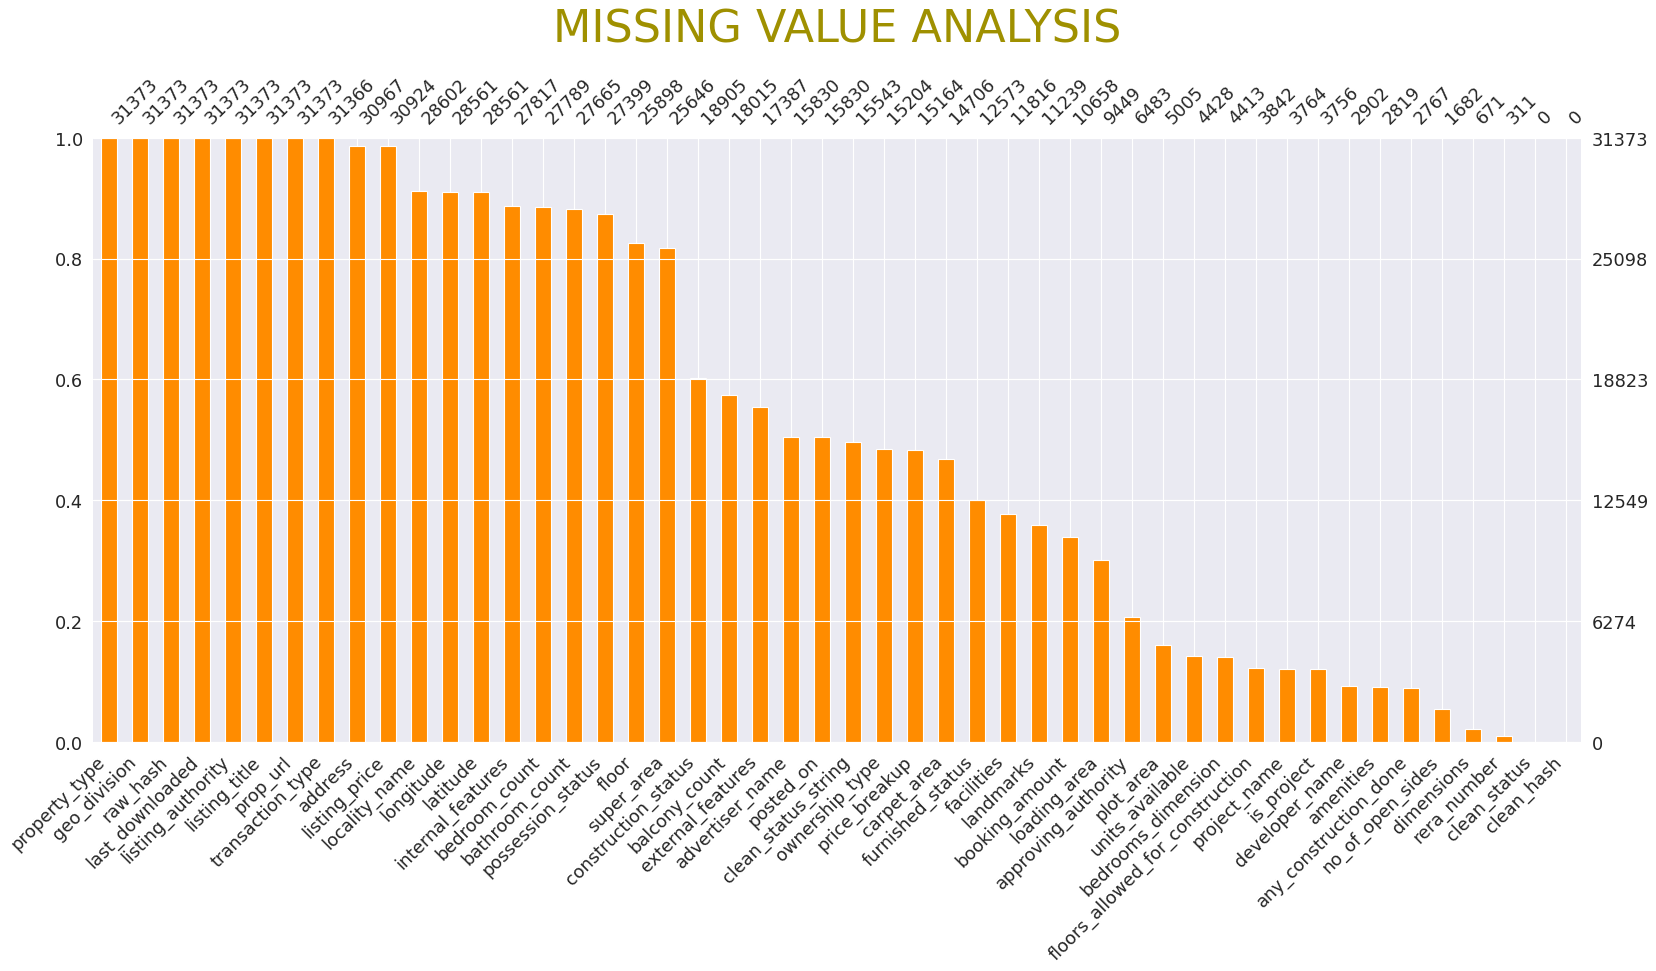

In [ ]:
miss = msno.bar(df,n=48, p=0.9, sort='descending', color='darkorange')
miss.set_title("MISSING VALUE ANALYSIS", fontsize=40, pad=30, color='#9f9000')
miss

In [ ]:
dicti = []
for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull())*100,2)
    dicti.append([col,pct_missing])

df_miss = pd.DataFrame(dicti)
df_miss.columns=['Column Name','Missing %']
df_miss = df_miss.sort_values(by='Missing %', ascending=False)
print("\n Missing Value Percentage Table (in descending order) \n")
df_miss


 Missing Value Percentage Table (in descending order) 



Column Name  Missing %
42                       clean_hash     100.00
41                     clean_status     100.00
28                      rera_number      99.01
24                       dimensions      97.86
16                 no_of_open_sides      94.64
38            any_construction_done      91.18
29                        amenities      91.01
0                    developer_name      90.75
11                       is_project      88.03
20                     project_name      88.00
6   floors_allowed_for_construction      87.75
27               bedrooms_dimension      85.93
9                   units_available      85.89
26                        plot_area      84.05
2               approving_authority      79.34
21                     loading_area      69.88
10                   booking_amount      66.03
3                         landmarks      64.18
36                       facilities      62.34
47                 furnished_status      59.92
33                      carpet_area      53.13
45                    price_breakup      51.67
18                   ownership_type      51.54
43              clean_status_string      50.46
46                        posted_on      49.54
44                  advertiser_name      49.54
17                external_features      44.58
31                    balcony_count      42.58
19              construction_status      39.74
32                       super_area      18.25
1                             floor      17.45
23                possession_status      12.67
8                    bathroom_count      11.82
5                     bedroom_count      11.42
15                internal_features      11.33
30                        longitude       8.96
14                         latitude       8.96
25                    locality_name       8.83
12                    listing_price       1.43
34                          address       1.29
13                 transaction_type       0.02
35                    property_type       0.00
37                listing_authority       0.00
4                      geo_division       0.00
39                  last_downloaded       0.00
40                         raw_hash       0.00
7                     listing_title       0.00
22                         prop_url       0.00

***Observations from the missing value analyis:***

**1. Property Type has 0% values -- can be an important feature and further analysis should be performed.**

**2. Transaction Type has 0.2% values -- can be an important feature and further analysis should be performed.**

**3. Developer name and Project name seem to be having very close missing percentages -- is there a correlation between these two missing features?**

4. 

***Is there a correlation between the missing values in developer name and project name?***

Text(0.5, 1.0, 'Missing value Pattern Matrix')

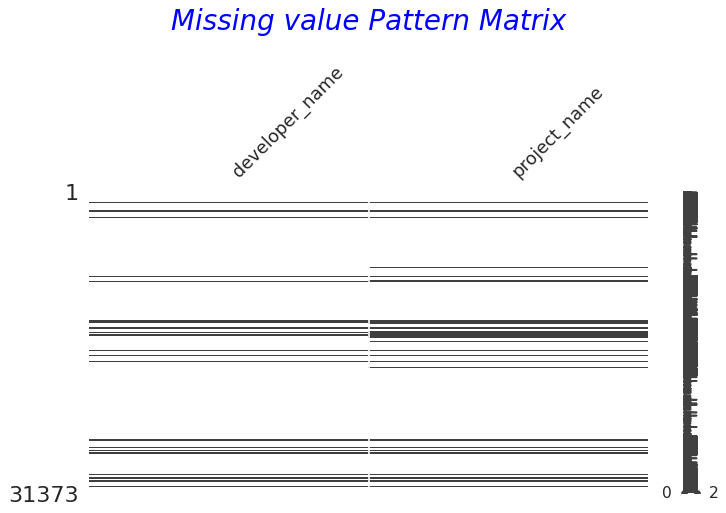

In [ ]:
miss_corr = df[['developer_name', 'project_name']]
msno.matrix(miss_corr,figsize=(10,5) ,p=0.9)
plt.title("Missing value Pattern Matrix", fontsize=25, pad=30, color='blue', fontstyle='oblique')

***As suspected, there seems to be a correlation between the missing values in project name and developer name.*** 

# ***A visual overview into the features of the commonfloor dataset through a Univariate analysis.***


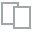
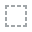
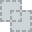
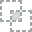
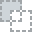
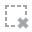
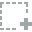
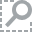
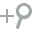
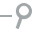
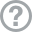
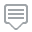
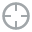
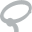
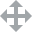
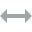
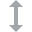
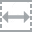
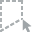
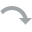
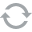
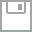
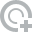
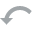
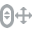
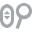
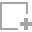
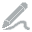
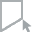
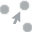
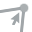
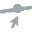

In [ ]:
plot(df)

***Observations from the Univariate Graphical Analysis of the features of listed properties***:

1. The number of bedroom and number of bathrooms in the majority of the properties are 2 and 2 respectively.
2. Resale properties lead the count number for transaction type.
3. Most of the list properties have one open side.
4. Freehold properties lead the count number for properties based on ownership type.
5. RERA number is missing for the majority of properties.

# ***Property Type***

***Property type has 0% missing values -- it can be an important indicator of price***

In [ ]:
prop_count = df['property_type'].value_counts().to_frame('çount').reset_index()
prop_count.columns = ['property_type', 'count']
prop_count

property_type  count
0   Builder Floor Apartment  12823
1                 Apartment  11276
2         Residential House   4013
3          Residential Plot   2875
4                     Villa    157
5          Studio Apartment    140
6           Commercial Shop     29
7   Commercial Office Space     25
8                 Penthouse     17
9           Commercial Land      8
10      Commercial Showroom      4
11               Farm House      3
12        Warehouse/ Godown      1
13          Industrial Land      1
14      Industrial Building      1

***Check to see if plot area is unique only to Residential Plot - since 84% of plot area is missing***

In [ ]:
f = df.groupby('plot_area')['property_type'].value_counts().to_frame('transaction type count').reset_index()
#filter = f["property_type"]=="Residential Plot"
#f.where(filter, inplace = True)
filter = f['property_type']!='Residential Plot'
not_plot = f.where(filter)
not_plot.dropna()

plot_area            property_type  transaction type count
9      100 sqft  Builder Floor Apartment                   20.00
10     100 sqft        Residential House                    8.00
11     100 sqft                    Villa                    1.00
13      100 sqm  Builder Floor Apartment                    2.00
15    100 sqyrd  Builder Floor Apartment                   45.00
...         ...                      ...                     ...
1032   950 sqft        Residential House                    1.00
1036   960 sqft  Builder Floor Apartment                    1.00
1040   98 sqyrd  Builder Floor Apartment                    2.00
1041   982 sqft        Residential House                    1.00
1044   990 sqft  Builder Floor Apartment                    2.00

[497 rows x 3 columns]

***Instances of plot area can also be seen in other property types - it is not unique to residential plot.***

***Distriution of Property Types by count***

In [ ]:
configure_plotly_browser_state()
plt.figure(figsize=(10,10))

dist = df['property_type'].value_counts()
#colors = ['mediumturquoise', 'darkorange', 'blue', 'red']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
#fig.show()

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

***Comparison of property types against their median listing prices***

In [ ]:
pplott2 = df.groupby('property_type', as_index=False)['listing_price'].median()
pplott2 = pplott2.sort_values(by='listing_price', ascending=False) 
pplott2

property_type  listing_price
6                Farm House 900,000,000.00
7       Industrial Building  30,000,000.00
2           Commercial Land  25,500,000.00
14        Warehouse/ Godown  15,000,000.00
5       Commercial Showroom  14,950,000.00
3   Commercial Office Space  13,000,000.00
13                    Villa  13,000,000.00
9                 Penthouse  10,500,000.00
4           Commercial Shop   6,500,000.00
10        Residential House   6,500,000.00
0                 Apartment   5,800,000.00
11         Residential Plot   5,200,000.00
1   Builder Floor Apartment   4,500,000.00
8           Industrial Land   4,000,000.00
12         Studio Apartment   1,800,000.00

In [ ]:
import plotnine as gg
from plotnine import *

***Relationship between Listing Price and Property Type***

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

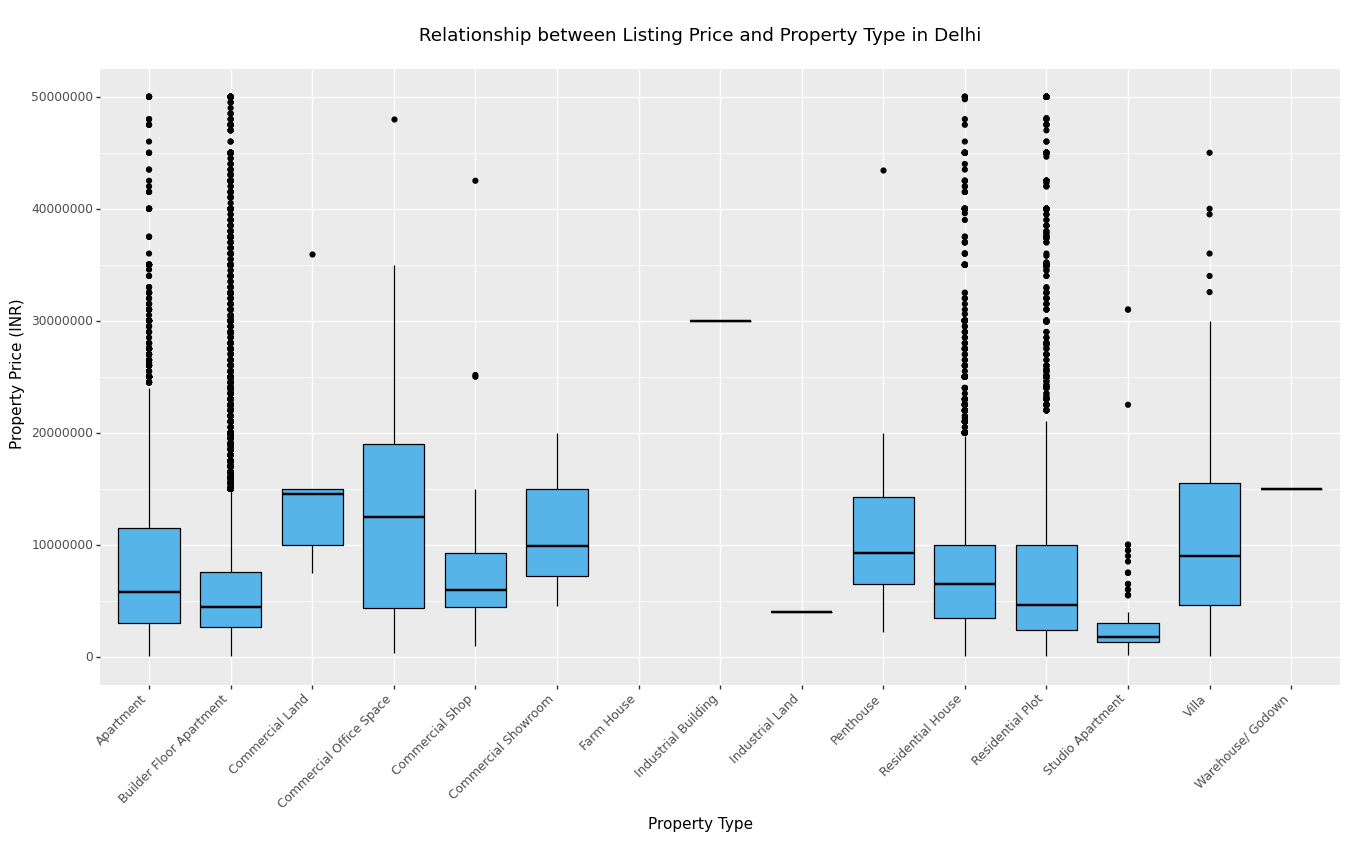

<ggplot: (8789964327721)>

In [ ]:
box1 = ggplot(df, aes(x = 'property_type', y='listing_price')) + geom_boxplot(colour="black", fill="#56B4E9") + ylim(0,50000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) +  xlab("Property Type") + ylab("Property Price (INR)") + ggtitle("\n Relationship between Listing Price and Property Type in Delhi \n")


plt.figure(figsize=(20,20)) 
box1

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

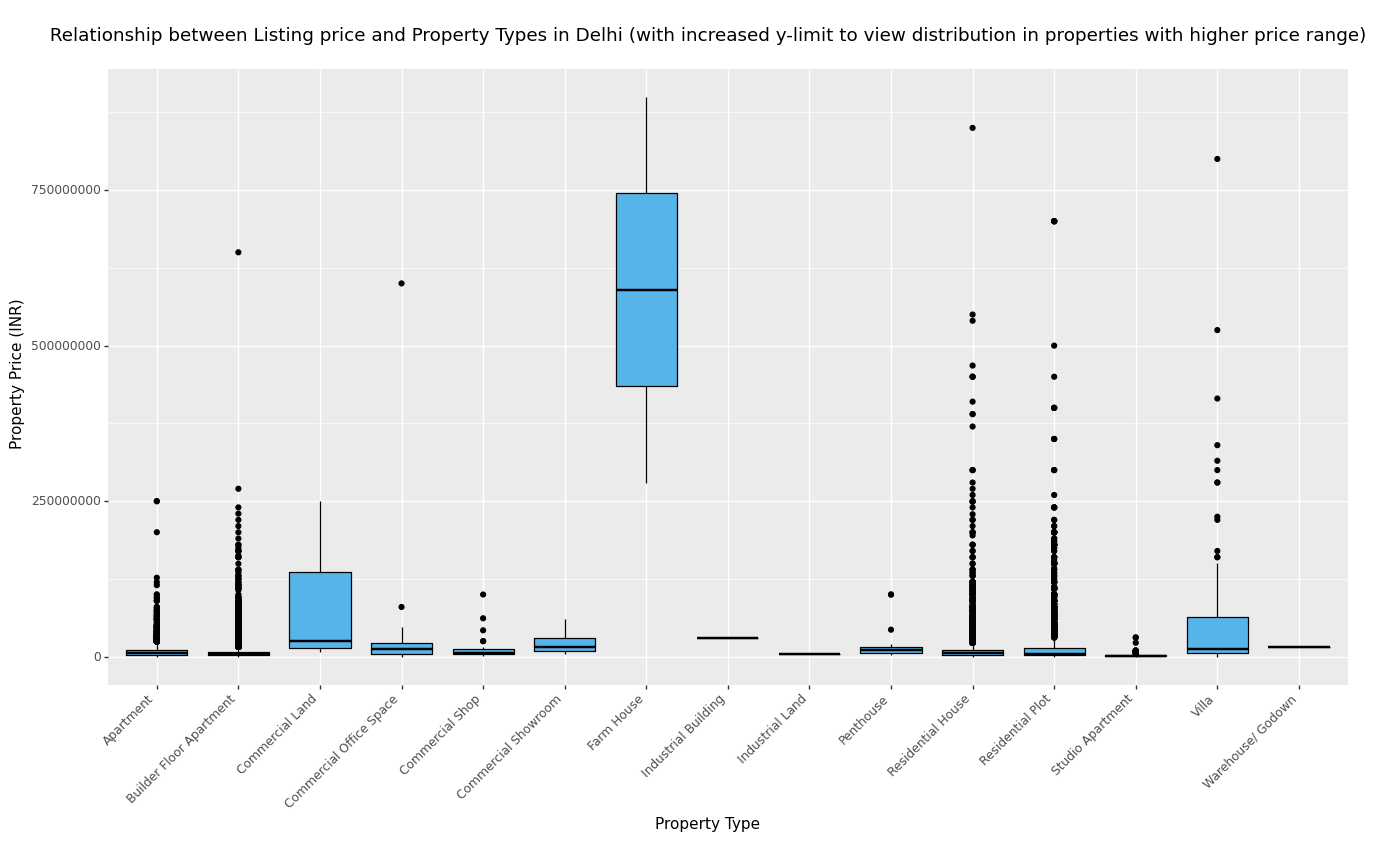

<ggplot: (8789986059357)>

In [ ]:
box2 = ggplot(df, aes(x = 'property_type', y='listing_price')) + geom_boxplot(colour="black", fill="#56B4E9") + ylim(0,900000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) +  xlab("Property Type") + ylab("Property Price (INR)") + ggtitle("\n Relationship between Listing price and Property Types in Delhi (with increased y-limit to view distribution in properties with higher price range) \n")


plt.figure(figsize=(20,20)) 
box2

***Observations from visual analysis of relationship between propertyt type and price***:

***1. Farm House has the highest median price among all listed properties, coupled with higher variance***

***2. Properties in order of median listing price, followed by farm house -- commercial land, commercial showroom, commercial office space, penthouse, villa. [Not including industrial land, industrial building, and Warehouse as they have only 1 count of occurence each]***

***3. Commercial properties seem to have higher listing price than residential properties***.

***Distribution of transaction type in each property type***

In [ ]:
df.groupby('property_type')['transaction_type'].value_counts().to_frame('transaction type count')


transaction type count
property_type           transaction_type                        
Apartment               Resale                             10422
                        New Property                         850
                        Rent                                   2
Builder Floor Apartment Resale                              9879
                        New Property                        2938
                        Rent                                   5
Commercial Land         Resale                                 6
                        New Property                           2
Commercial Office Space Resale                                23
                        New Property                           2
Commercial Shop         Resale                                25
                        New Property                           4
Commercial Showroom     Resale                                 4
Farm House              Resale                                 3
Industrial Building     Resale                                 1
Industrial Land         Resale                                 1
Penthouse               Resale                                17
Residential House       Resale                              3835
                        New Property                         173
                        Rent                                   1
Residential Plot        Resale                              2709
                        New Property                         166
Studio Apartment        Resale                               131
                        New Property                           8
                        Rent                                   1
Villa                   Resale                               151
                        New Property                           6
Warehouse/ Godown       Resale                                 1

***Relationship between listing price - property type - transaction type***

<Figure size 960x640 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

[(0.0, 125000000.0)]

Text(0.5, 0, 'Property Type')

Text(0, 0.5, 'Listing Price (INR (in ten crores))')

Text(0.5, 1.0, '\n Relationship between listing price - property type - transaction type \n \n')

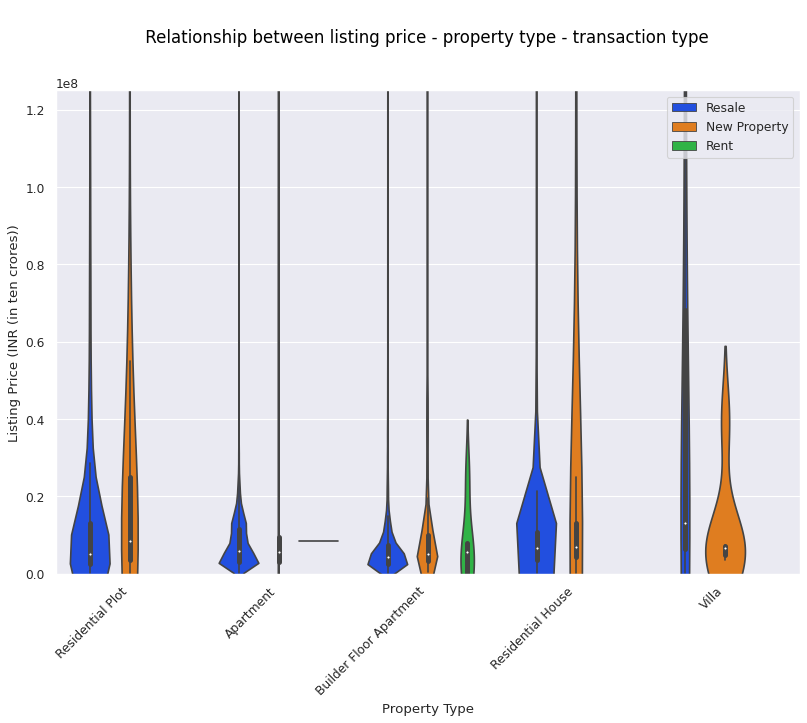

In [ ]:
nn= df[['property_type', 'transaction_type', 'listing_price']]
nn = nn[(nn['property_type'].isin(['Apartment','Builder Floor Apartment', 'Residential Plot', 'Residential House', 'Villa'])) ]
plt.figure(figsize=(12,8))
plt.xticks(rotation=45, ha='right')
#plt.legend(loc='upper right', bbox_to_anchor=(0.6,0.7))
nk = sns.violinplot(x="property_type", y="listing_price", hue="transaction_type",
                    data=nn, palette="bright")
nk.legend(loc='upper right')
nk.set(ylim=(0,125000000))
nk.set_xlabel("Property Type")
nk.set_ylabel('Listing Price (INR (in ten crores))')
nk.set_title("\n Relationship between listing price - property type - transaction type \n \n", fontsize=15, color='black')

**Probability distribution of prices in the top 5 property types (by count)**

In [ ]:
den = df.copy()
den = den[(den['property_type'].isin(['Builder Floor Apartment','Apartment', 'Residential House', 'Residential Plot', 'Villa', 'Studio Apartment'])) ]

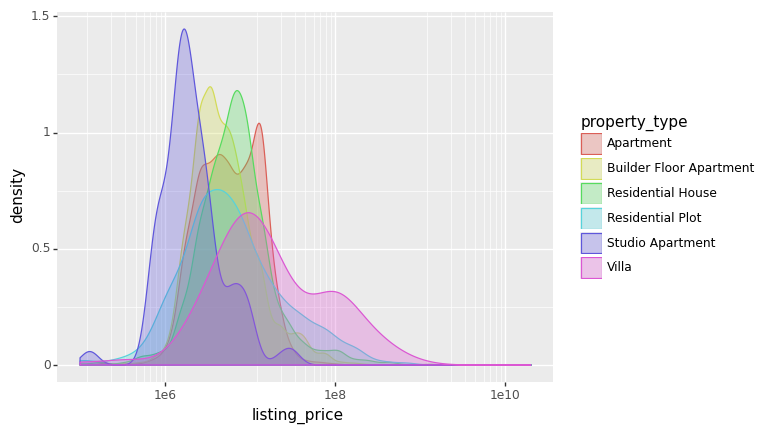

<ggplot: (8789964327813)>

In [ ]:
# -- peaks: where the values are concentrated over the price
(
    ggplot(den, aes(x='listing_price', color='property_type', fill='property_type'))
    + geom_density(alpha=0.3) + scale_x_log10()
)

# ***Transaction Type***

In [ ]:
transact_price = df[['transaction_type', 'listing_price']]
transact_price = transact_price.dropna()

In [ ]:
print ("\nDistribution of transaction type in listed properties \n")
q3 = transact_price['transaction_type'].value_counts().to_frame().reset_index()
q3 = q3.rename(columns={'index':'transaction_type', 'transaction_type':'count'})
q3


Distribution of transaction type in listed properties 



transaction_type  count
0           Resale  26762
1     New Property   4149
2             Rent      7

In [ ]:
fig7 = px.pie(q3, values="count", names="transaction_type", width=1000, height=900, title='Distribution of transaction type in properties')
fig7.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig7.show(renderer="colab")

***Observations from the distribution chart for transaction type***:

1. ***Properties listed as Resale have the highest proportion of listings -- 85.8%***
2. ***Properties listed as Rent have a negligible share in property listings -- 0.025%***. 

***Relationship between transaction type and listing price***

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

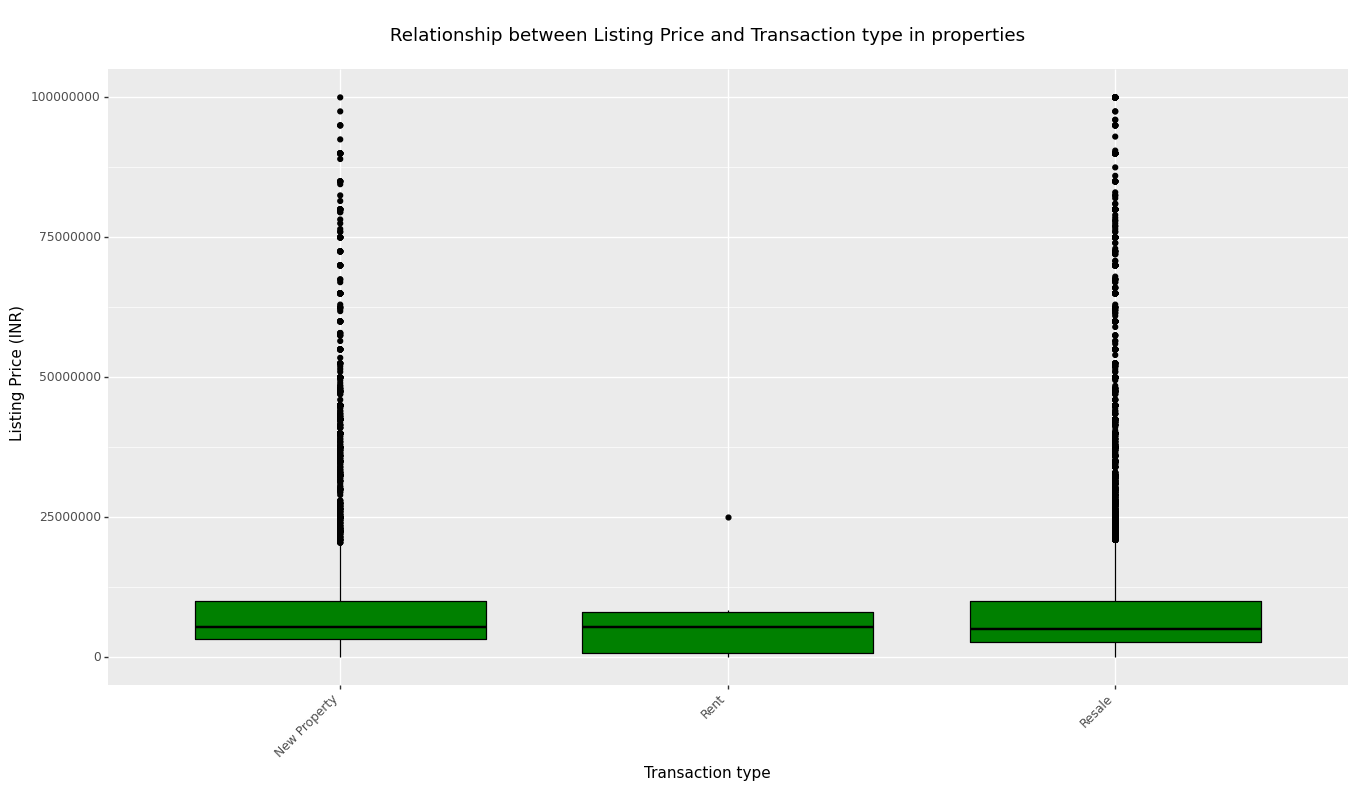

<ggplot: (8789961689397)>

In [ ]:
box8 = ggplot(transact_price, aes(x = 'transaction_type', y='listing_price')) + geom_boxplot(colour="black", fill="green") + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + ylim(0,100000000) + theme(figure_size=(16, 8)) + xlab("Transaction type") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Transaction type in properties \n") 
plt.figure(figsize=(15,15)) 
box8

***Zooming in to observe median prices***

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

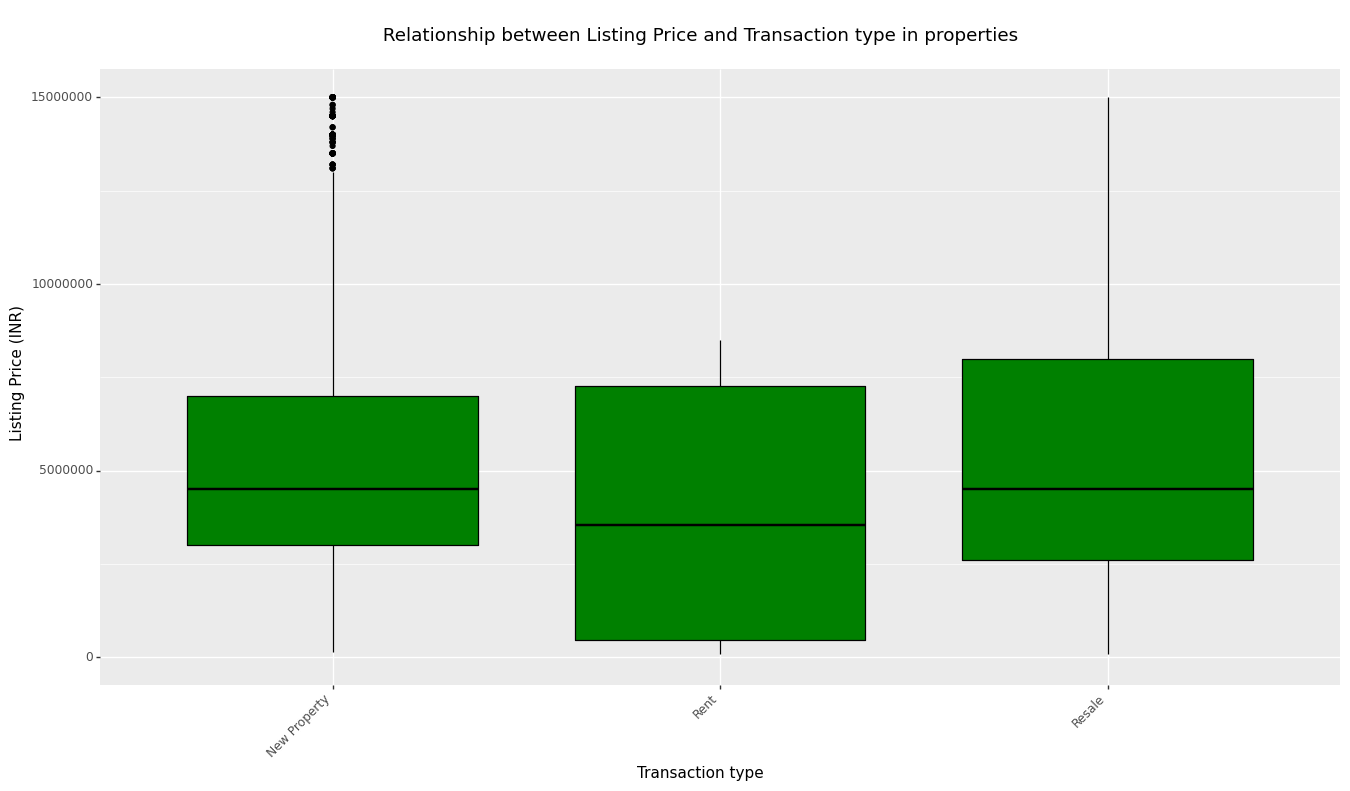

<ggplot: (8789961643465)>

In [ ]:
box8 = ggplot(transact_price, aes(x = 'transaction_type', y='listing_price')) + geom_boxplot(colour="black", fill="green") + ylim(0,15000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Transaction type") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Transaction type in properties \n") 
plt.figure(figsize=(15,15)) 
box8

***Th median price of new property and resale seem very close -- zoom in further to observe their median prices***

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

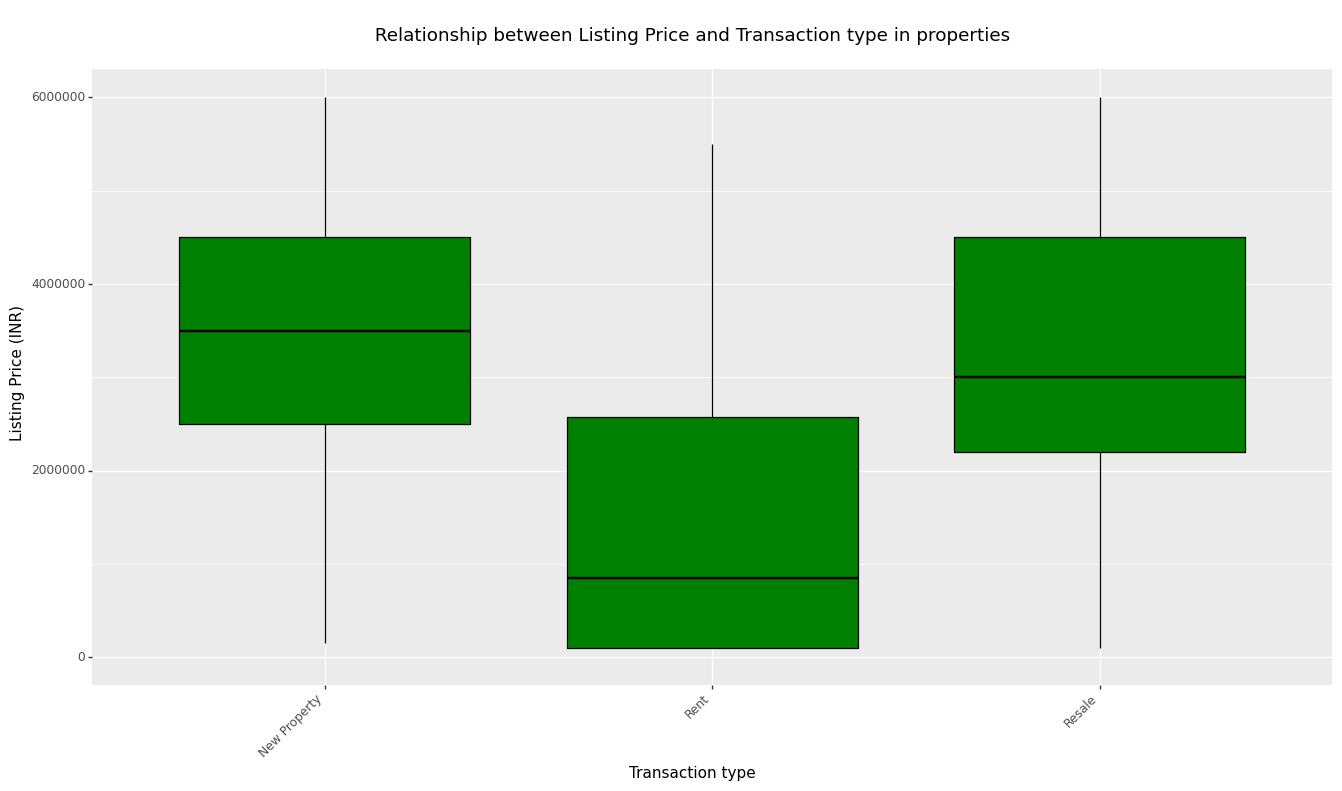

<ggplot: (8789961693017)>

In [ ]:
box8 = ggplot(transact_price, aes(x = 'transaction_type', y='listing_price')) + geom_boxplot(colour="black", fill="green") + ylim(0,6000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Transaction type") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Transaction type in properties \n") 
plt.figure(figsize=(15,15)) 
box8

***Observations from the boxplots visualizing the relationship between transaction type and listing price***:

***1. Median prices of New Property is higher than both properties for resale and rent***.

***2. Properties for Rent have the highest variance in prices***.

# ***Locality name***

In [ ]:
df['locality_name'].unique()

array([nan, 'Dilshad Colony', 'Aashirwaad Chowk, Dwarka', ...,
       'Munirka Vihar, Munirka', 'Sansad Vihar, Dwarka',
       'Neb Valley, Sainik Farm'], dtype=object)

In [ ]:
local_group = df.groupby('locality_name', as_index=False)['geo_division'].count() 
local_group.rename(columns = {'geo_division' : 'Total count'}, inplace = True)
local_group = local_group.sort_values(by='Total count', ascending=False)
local_group_20 = local_group.head(20)
print("\033[1m" + "Top 20 Listed localities in Delhi with their count" + "\033[0m" + "\n")
local_group_20

Top 20 Listed localities in Delhi with their count



locality_name  Total count
1193                    Uttam Nagar          848
1196               Uttam Nagar West          734
230                      Dwarka Mor          605
166                     Chhattarpur          346
674     Mohan Garden, Razapur Khurd          337
658                        Mehrauli          317
948                Rohini Sector 24          315
1055                       Shahdara          291
696                       Najafgarh          286
575                     Laxmi Nagar          266
1221                      Vikaspuri          243
604          Mahavir Enclave Part 1          235
816                   Paschim Vihar          232
229                          Dwarka          227
1195  Uttam Nagar East, Uttam Nagar          212
147                          Burari          207
418                       Janakpuri          205
650                   Mayur Vihar 1          203
332                 Govindpuri Main          201
957                Rohini Sector 34          198

In [ ]:
fig2 = px.pie(local_group_20, values="Total count", names="locality_name", width=1000, height=900, title='Distribution of Localities in Delhi by Count (Top 25)')
fig2.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig2.show(renderer="colab")

In [ ]:
df2 = df.copy()
df2.groupby('property_type', as_index=False).count()

property_type  developer_name  ...  posted_on  furnished_status
0                 Apartment            2431  ...       5409              4091
1   Builder Floor Apartment             390  ...       6729              6417
2           Commercial Land               0  ...          8                 8
3   Commercial Office Space               4  ...         25                18
4           Commercial Shop               1  ...         29                22
5       Commercial Showroom               0  ...          4                 3
6                Farm House               3  ...          3                 0
7       Industrial Building               0  ...          1                 1
8           Industrial Land               0  ...          1                 0
9                 Penthouse               2  ...          8                 7
10        Residential House              64  ...       1938              1880
11         Residential Plot               0  ...       1545                 0
12         Studio Apartment               5  ...         74                70
13                    Villa               2  ...         55                55
14        Warehouse/ Godown               0  ...          1                 1

[15 rows x 48 columns]

***Extract names of top 10 listed localities to see their price distribution***

In [ ]:
df4 = df[(df['locality_name'].isin(['Uttam Nagar','Uttam Nagar West', 'Dwarka Mor', 'Mohan Garden, Razapur Khurd', 'Chhattarpur', 'Mehrauli', 'Shahdara', 'Najafgarh', 'Laxmi Nagar', 'Rohini Sector 24'])) ]


<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

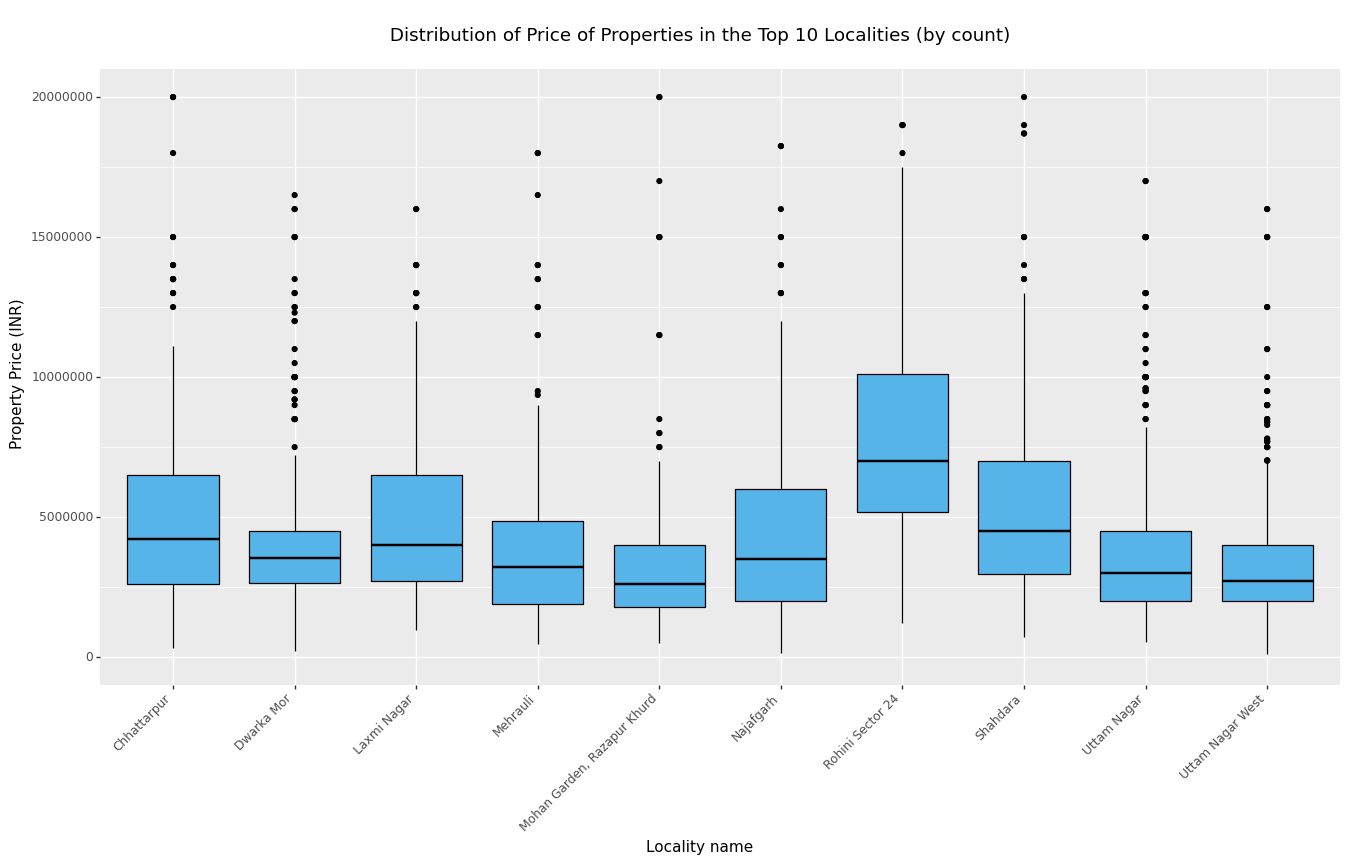

<ggplot: (8789961640253)>

In [ ]:
box3 = ggplot(df4, aes(x = 'locality_name', y='listing_price')) + geom_boxplot(colour="black", fill="#56B4E9") + ylim(0,20000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Locality name") + ylab("Property Price (INR)") + ggtitle("\n Distribution of Price of Properties in the Top 10 Localities (by count) \n") 
plt.figure(figsize=(20,20)) 
box3

# ***Listing Price***

Statistical breakdown of Listing prices in Delhi

In [ ]:
price = df['listing_price']
print ("\033[1m" + "Statistical Breakdown of Property Prices in Delhi" + "\033[0m" + "\n")
g = price.describe()
g = g.to_frame()
g.head(8)

Statistical Breakdown of Property Prices in Delhi



listing_price
count         30,924.00
mean      10,880,421.62
std      118,344,412.79
min          100,000.00
25%        2,900,000.00
50%        5,200,000.00
75%       10,000,000.00
max   20,250,000,000.00

**Explore the variance and distribution of the overall listtng price in the dataset through a Boxplot to understand the overall skewness and presence of outliers**

[Text(0.5, 0, 'Property Price (INR (in crores))')]

[(0.0, 50000000.0)]

Text(0.5, 1.0, '\nBoxplot of distribution of Property Price in Delhi\n')

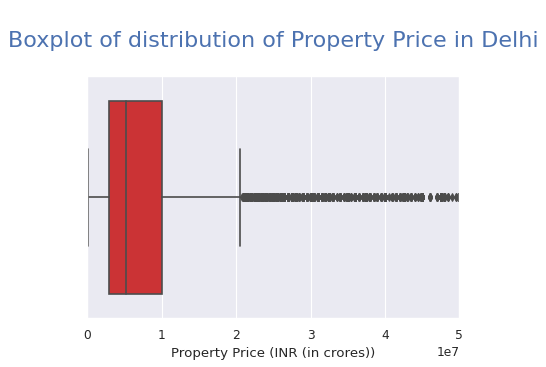

In [ ]:
j = sns.boxplot(data=df, x='listing_price',palette="Set1" )
j.set(xlabel='Property Price (INR (in crores))')
j.set(xlim=(0,50000000))
j.set_title("\n" + "Boxplot of distribution of Property Price in Delhi" + "\n", fontsize=20, color='b')

***Further insight into the Listing Price -- toggle between the different chart and statistical options***


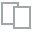
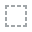
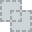
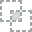
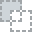
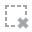
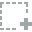
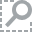
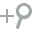
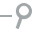
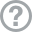
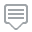
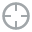
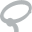
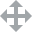
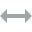
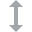
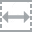
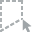
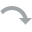
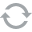
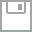
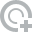
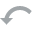
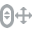
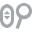
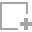
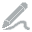
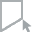
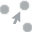
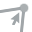
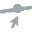

In [ ]:
plot(df, 'listing_price')

***Observations from the Property Price distribution Analysis***:

*   *Standard deviation being greater than mean implies the property price in Delhi is **not normally distributed** (p-value 4.226614035497637e-25)* -- toggling to the **Q-Q plot** in the above visual show's the **Sample quantiles deviated from the theoretical quantiles**. 
*    *A **large variance** indicates that the property prices are far from the mean property price and far from each other*.
*     *Mean is greater than median indicating a **positively skewed distribution** - more prices on the higher end of the price distribution -- skewness score of 162.001. The longer part of the Interquartile range of the boxplot lies above the median, thus confirming the positive skew.* 

***Cummulative Distribution of Probability Price***

<Figure size 800x400 with 0 Axes>

(0.0, 80000000.0)

Text(0.5, 1.0, ' \n Cummulative Distribution of Property Price in Delhi \n')

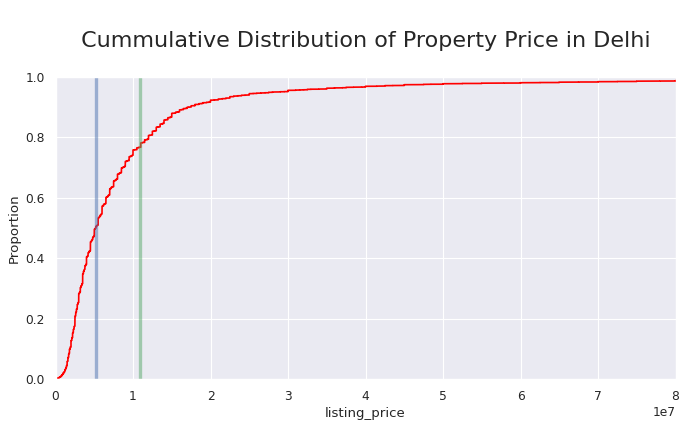

In [ ]:
plt.figure(figsize=(10,5))
sns.ecdfplot(data=df, x='listing_price', color='red')
#lll.set(ylim=(0,200000000))

plt.axvline(x=df['listing_price'].mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df['listing_price'].median(), linewidth=3, color='b', label="median", alpha=0.5)

plt.xlim(0,80000000)


plt.title(" \n Cummulative Distribution of Property Price in Delhi \n", fontsize=20)

***Interpretation of cummulative distribution listing prices for properties in Delhi***:

1. Observing the mean (green line) and median lines (red line) in the ECDF plot shows that **mean is greater than median across the price distribution**. This confirms that the property prices across Delhi are **positively skewed** -- greater frequency of prices on the higher end of the distribution.

2. ***Observation: About 80% of listing prices of the listed properties fall below INR 10,00,00,000.*** 



# ***Super Area***

***Relationship between Super Area and Listing Price***

In [ ]:
fff = df[['listing_price', 'super_area']]

***Extract the metric names from the super area***

In [ ]:
fff['metric']=fff['super_area'].str.extract('([a-z]+)')
fff.tail()

listing_price super_area metric
42456  12,100,000.00  1500 sqft   sqft
42458  14,500,000.00  1450 sqft   sqft
42459  10,000,000.00  1250 sqft   sqft
42460  45,000,000.00        NaN    NaN
42461  13,000,000.00  1600 sqft   sqft

***Super Area has 18.11% missing values -- drop the missing values to proceed with further analysis.***

In [ ]:
fff = fff.dropna()

In [ ]:
fff['super_area'] =  fff['super_area'].str.replace(r'\D',"") #replacing all non digits with empty string

fff['super_area'] = pd.to_numeric(fff['super_area'], errors='coerce')
fff

listing_price  super_area metric
1       3,000,000.00         650   sqft
2       2,700,000.00         625   sqft
4       4,000,000.00         650   sqft
6       4,200,000.00        1100   sqft
8      18,000,000.00        1740   sqft
...              ...         ...    ...
42455  14,000,000.00        1650   sqft
42456  12,100,000.00        1500   sqft
42458  14,500,000.00        1450   sqft
42459  10,000,000.00        1250   sqft
42461  13,000,000.00        1600   sqft

[25454 rows x 3 columns]

In [ ]:
fff['metric'].unique()

array(['sqft', 'sqyrd', 'sqm', 'biswa', 'hectare', 'are', 'acre',
       'ground', 'marla', 'bigha'], dtype=object)

***Metric Anomaly:super area has values listed in 10 different metric formats***

***Convert the different metric values to a standard metric value - 'square feet'***

In [ ]:
vals = {'sqft': 1,
    'sqm': 10.76,
    'sqyrd': 9,
    'bigha': 14400,
    'guntha': 1089,
    'hectare':107639,
    'ground':2400.35,
    'marla':272.25,
    'acre':43560,
    'aankadam':72.06,
    'are':1076.39,
    'rood':10890,
    'biswal':1350,
    'biswa':1350}

fff['super_area (sqft)'] = fff['super_area']*(fff['metric'].map(vals))

fff

listing_price  super_area metric  super_area (sqft)
1       3,000,000.00         650   sqft             650.00
2       2,700,000.00         625   sqft             625.00
4       4,000,000.00         650   sqft             650.00
6       4,200,000.00        1100   sqft           1,100.00
8      18,000,000.00        1740   sqft           1,740.00
...              ...         ...    ...                ...
42455  14,000,000.00        1650   sqft           1,650.00
42456  12,100,000.00        1500   sqft           1,500.00
42458  14,500,000.00        1450   sqft           1,450.00
42459  10,000,000.00        1250   sqft           1,250.00
42461  13,000,000.00        1600   sqft           1,600.00

[25454 rows x 4 columns]

***With all the values in the super area having the same metric units (square feet), a graphical analysis to find the correlation between listing price and super area can be performed***

In [ ]:
super_area_price = fff[['super_area (sqft)', 'listing_price']]
super_area_price

super_area (sqft)  listing_price
1                 650.00   3,000,000.00
2                 625.00   2,700,000.00
4                 650.00   4,000,000.00
6               1,100.00   4,200,000.00
8               1,740.00  18,000,000.00
...                  ...            ...
42455           1,650.00  14,000,000.00
42456           1,500.00  12,100,000.00
42458           1,450.00  14,500,000.00
42459           1,250.00  10,000,000.00
42461           1,600.00  13,000,000.00

[25454 rows x 2 columns]

[(0.0, 200000000.0)]

[(0.0, 9000.0)]

Text(0, 0.5, 'Property Price (INR (in crores))')

Text(0.5, 0, 'Super built up area')

Text(0.5, 1.0, '\nRegression Plot of Property Price vs Super built up area\n')

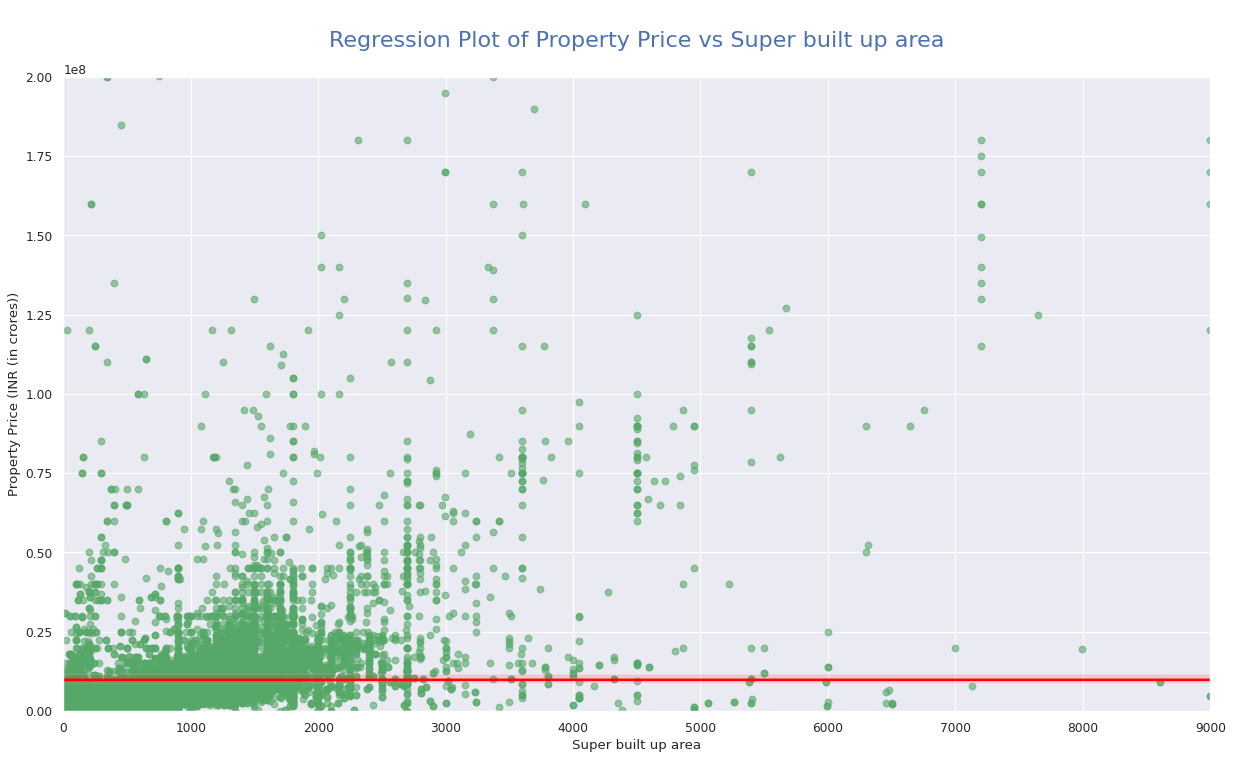

In [ ]:
g = sns.regplot(x='super_area (sqft)', y='listing_price', data=super_area_price, color='g', scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
g.figure.set_size_inches(18.5, 10.5)

g.set(ylim=(0,200000000))
g.set(xlim=(0,9000))
g.set_ylabel("Property Price (INR (in crores))")
g.set_xlabel("Super built up area")
g.set_title("\n" + "Regression Plot of Property Price vs Super built up area" + "\n", fontsize=20, color='b')

***Zooming in to show high variance in listing price, which is causing the flat trend in the regression line***

[(0.0, 100000000.0)]

[(0.0, 4000.0)]

Text(0, 0.5, 'Property Price (INR (in crores))')

Text(0.5, 0, 'Super built up area')

Text(0.5, 1.0, '\nRegression Plot of Property Price vs Super built up area\n')

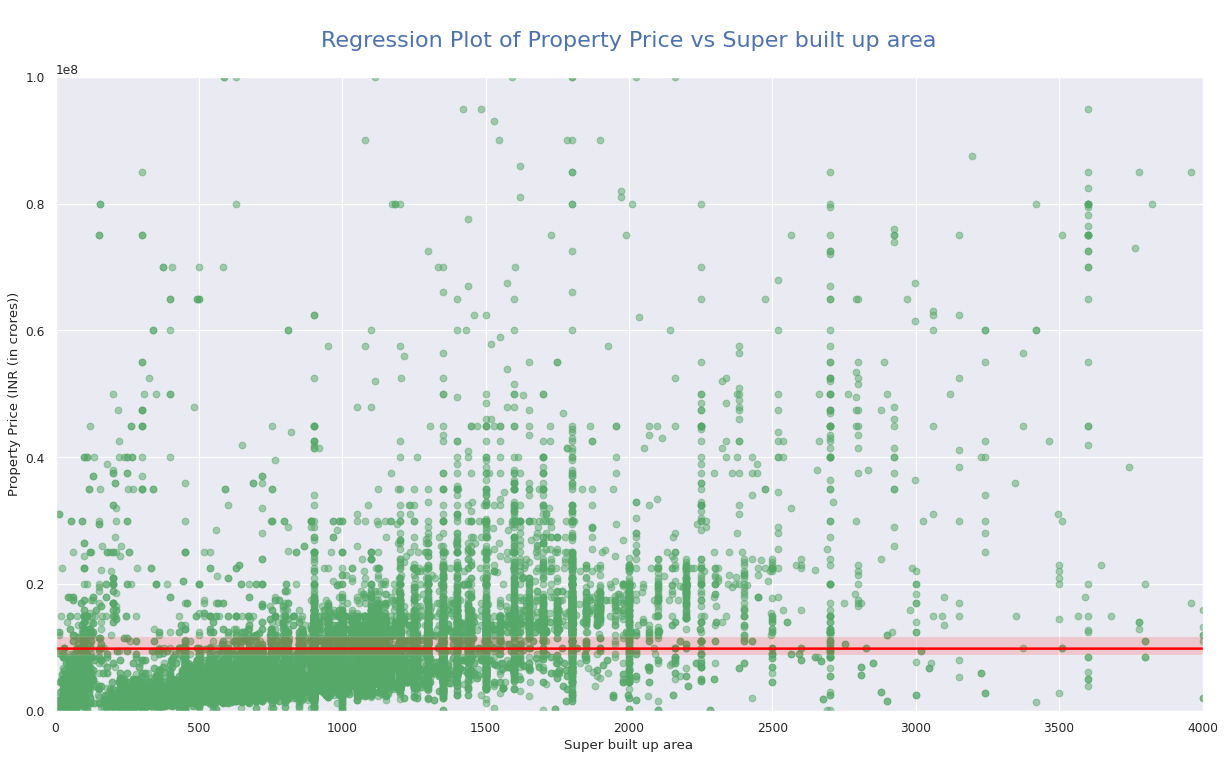

In [ ]:
g = sns.regplot(x='super_area (sqft)', y='listing_price', data=super_area_price, color='g', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
g.figure.set_size_inches(18.5, 10.5)

g.set(ylim=(0,100000000))
g.set(xlim=(0,4000))
g.set_ylabel("Property Price (INR (in crores))")
g.set_xlabel("Super built up area")
g.set_title("\n" + "Regression Plot of Property Price vs Super built up area" + "\n", fontsize=20, color='b')

[(0.0, 100000000.0)]

[(0.0, 9000.0)]

Text(0, 0.5, 'Property Price (INR (in crores))')

Text(0.5, 0, 'Super built up area')

Text(0.5, 1.0, '\nRegression Plot of Property Price vs Super built up area\n')

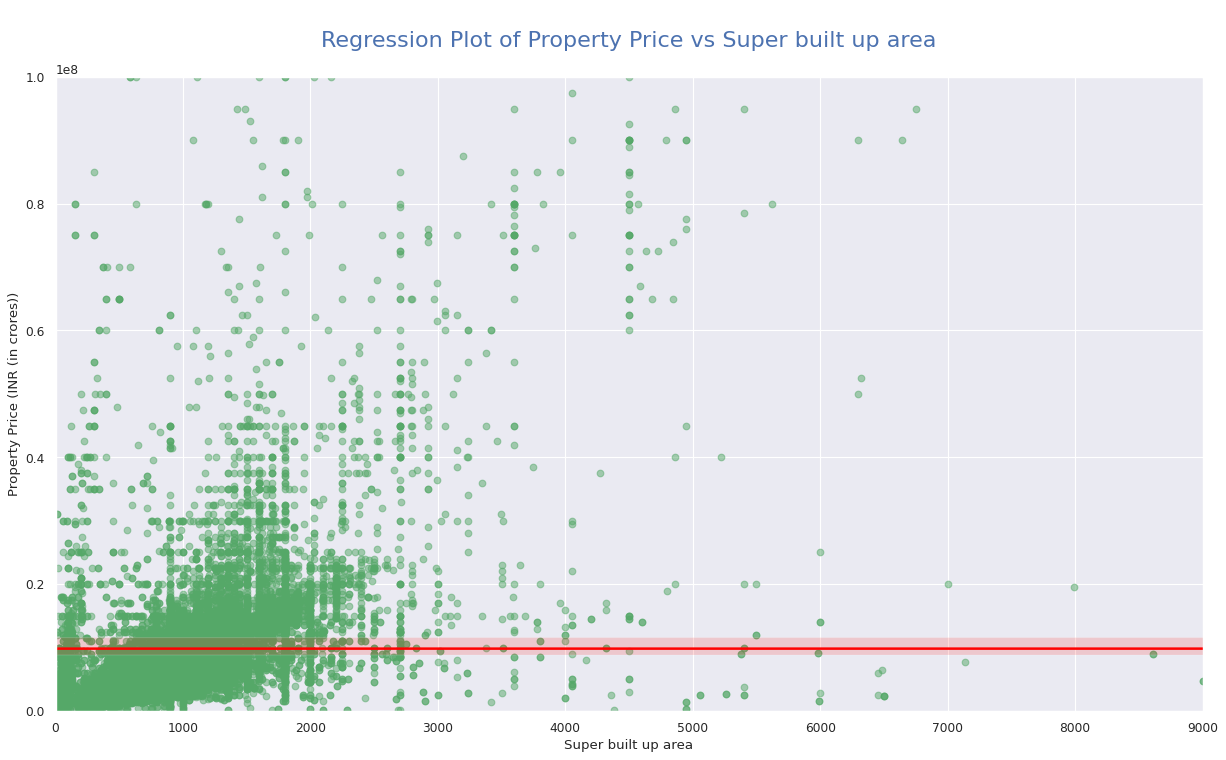

In [ ]:
g = sns.regplot(x='super_area (sqft)', y='listing_price', data=super_area_price, color='g', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
g.figure.set_size_inches(18.5, 10.5)

g.set(ylim=(0,100000000))
g.set(xlim=(0,9000))
g.set_ylabel("Property Price (INR (in crores))")
g.set_xlabel("Super built up area")
g.set_title("\n" + "Regression Plot of Property Price vs Super built up area" + "\n", fontsize=20, color='b')

***Taking the log of listing price***

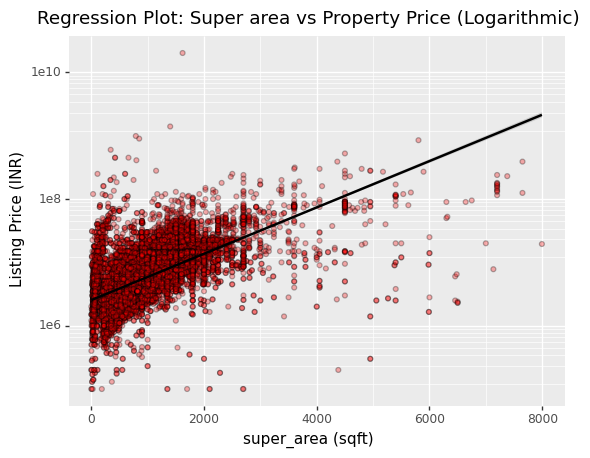

<ggplot: (8789961613433)>

In [ ]:
ggplot(super_area_price, aes(x = 'super_area (sqft)', y = 'listing_price')) + geom_point(alpha=0.3, colour='black', fill='red') + geom_smooth() + scale_y_log10() + xlim(0,8000)  + ylab("Listing Price (INR)") + ggtitle("Regression Plot: Super area vs Property Price (Logarithmic)")

***Observations from Regression plot of super area vs listing price***:

***The logarithmic regression plot (taking log of listing price) shows a positive trend in the regression line, indicating a positive correlaion between super area and listing price.***

# ***Carpet Area***

In [ ]:
carpet_price = df[['listing_price', 'carpet_area']]
carpet_price

listing_price carpet_area
0       1,200,000.00         NaN
1       3,000,000.00    650 sqft
2       2,700,000.00         NaN
3      16,000,000.00         NaN
4       4,000,000.00    600 sqft
...              ...         ...
42456  12,100,000.00   1300 sqft
42458  14,500,000.00   1300 sqft
42459  10,000,000.00   1050 sqft
42460  45,000,000.00         NaN
42461  13,000,000.00   1350 sqft

[31373 rows x 2 columns]

In [ ]:
carpet_price['metric'] = carpet_price['carpet_area'].str.extract('([a-z]+)')
carpet_price

listing_price carpet_area metric
0       1,200,000.00         NaN    NaN
1       3,000,000.00    650 sqft   sqft
2       2,700,000.00         NaN    NaN
3      16,000,000.00         NaN    NaN
4       4,000,000.00    600 sqft   sqft
...              ...         ...    ...
42456  12,100,000.00   1300 sqft   sqft
42458  14,500,000.00   1300 sqft   sqft
42459  10,000,000.00   1050 sqft   sqft
42460  45,000,000.00         NaN    NaN
42461  13,000,000.00   1350 sqft   sqft

[31373 rows x 3 columns]

In [ ]:
carpet_price = carpet_price.dropna()
carpet_price

listing_price carpet_area metric
1       3,000,000.00    650 sqft   sqft
4       4,000,000.00    600 sqft   sqft
13     12,000,000.00    900 sqft   sqft
14      3,950,000.00    600 sqft   sqft
22     20,000,000.00   2700 sqft   sqft
...              ...         ...    ...
42455  14,000,000.00   1250 sqft   sqft
42456  12,100,000.00   1300 sqft   sqft
42458  14,500,000.00   1300 sqft   sqft
42459  10,000,000.00   1050 sqft   sqft
42461  13,000,000.00   1350 sqft   sqft

[14654 rows x 3 columns]

In [ ]:
carpet_price['carpet_area'] =  carpet_price['carpet_area'].str.replace(r'\D',"") #replacing all non digits with empty string
carpet_price

listing_price carpet_area metric
1       3,000,000.00         650   sqft
4       4,000,000.00         600   sqft
13     12,000,000.00         900   sqft
14      3,950,000.00         600   sqft
22     20,000,000.00        2700   sqft
...              ...         ...    ...
42455  14,000,000.00        1250   sqft
42456  12,100,000.00        1300   sqft
42458  14,500,000.00        1300   sqft
42459  10,000,000.00        1050   sqft
42461  13,000,000.00        1350   sqft

[14654 rows x 3 columns]

In [ ]:
carpet_price['carpet_area'] = pd.to_numeric(carpet_price['carpet_area'], errors='coerce')
carpet_price

listing_price  carpet_area metric
1       3,000,000.00          650   sqft
4       4,000,000.00          600   sqft
13     12,000,000.00          900   sqft
14      3,950,000.00          600   sqft
22     20,000,000.00         2700   sqft
...              ...          ...    ...
42455  14,000,000.00         1250   sqft
42456  12,100,000.00         1300   sqft
42458  14,500,000.00         1300   sqft
42459  10,000,000.00         1050   sqft
42461  13,000,000.00         1350   sqft

[14654 rows x 3 columns]

***Convert the different metric values to a standard metric value -- square feet***

In [ ]:
vals = {'sqft': 1,
    'sqm': 10.76,
    'sqyrd': 9,
    'bigha': 14400,
    'guntha': 1089,
    'hectare':107639,
    'ground':2400.35,
    'marla':272.25,
    'acre':43560,
    'aankadam':72.06,
    'are':1076.39,
    'rood':10890,
    'biswal':1350,
    'biswa':1350}

carpet_price['carpet_area (sqft)'] = carpet_price['carpet_area']*(carpet_price['metric'].map(vals))

carpet_price

listing_price  carpet_area metric  carpet_area (sqft)
1       3,000,000.00          650   sqft              650.00
4       4,000,000.00          600   sqft              600.00
13     12,000,000.00          900   sqft              900.00
14      3,950,000.00          600   sqft              600.00
22     20,000,000.00         2700   sqft            2,700.00
...              ...          ...    ...                 ...
42455  14,000,000.00         1250   sqft            1,250.00
42456  12,100,000.00         1300   sqft            1,300.00
42458  14,500,000.00         1300   sqft            1,300.00
42459  10,000,000.00         1050   sqft            1,050.00
42461  13,000,000.00         1350   sqft            1,350.00

[14654 rows x 4 columns]

***Relationship between listing price and carpet area***

[(0.0, 100000000.0)]

[(0.0, 9000.0)]

Text(0, 0.5, 'Property Price (INR (in crores))')

Text(0.5, 0, 'Carpet area')

Text(0.5, 1.0, '\nRegression Plot of Property Price vs Carpet area\n')

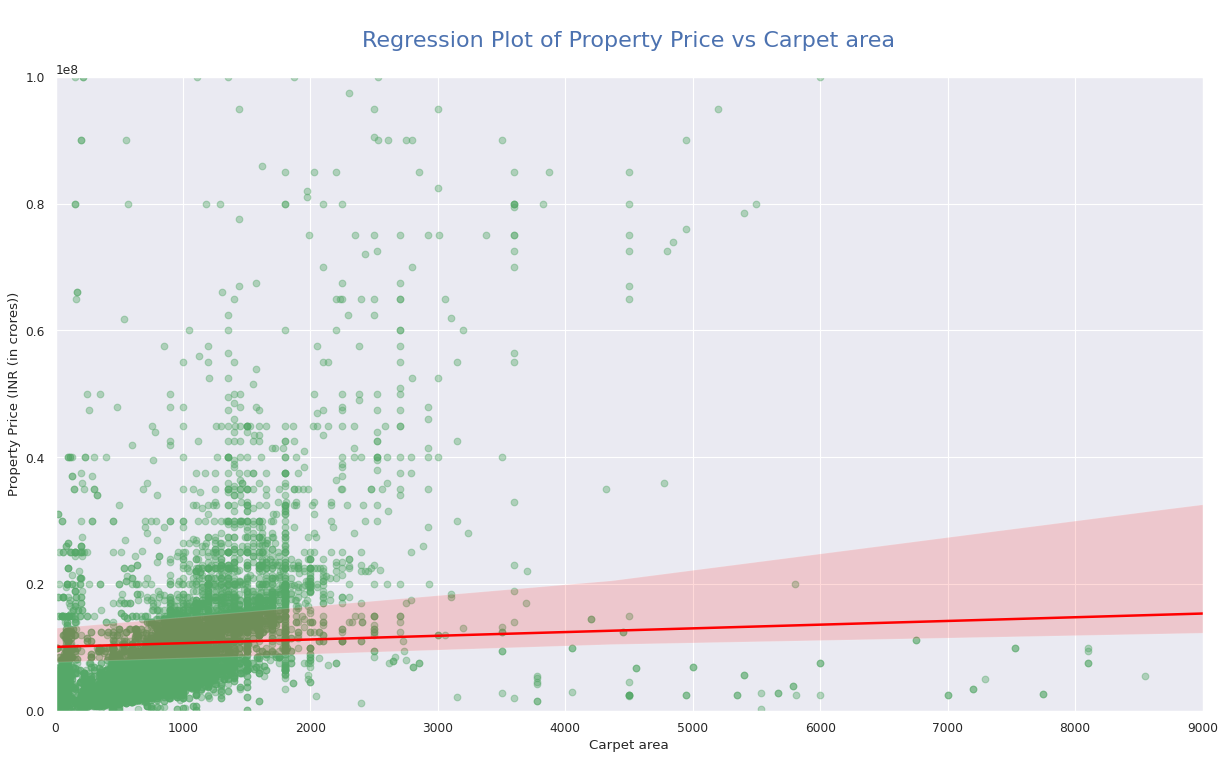

In [ ]:
k = sns.regplot(x='carpet_area (sqft)', y='listing_price', data=carpet_price, color='g', scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
k.figure.set_size_inches(18.5, 10.5)

k.set(ylim=(0,100000000))
k.set(xlim=(0,9000))
k.set_ylabel("Property Price (INR (in crores))")
k.set_xlabel("Carpet area")
k.set_title("\n" + "Regression Plot of Property Price vs Carpet area" + "\n", fontsize=20, color='b')

***Zooming in to observe the regression line***

[(0.0, 60000000.0)]

[(0.0, 9000.0)]

Text(0, 0.5, 'Property Price (INR (in crores))')

Text(0.5, 0, 'Carpet area')

Text(0.5, 1.0, '\nRegression Plot of Property Price vs Super built up area (zoomed in to observe trend of regression line)\n')

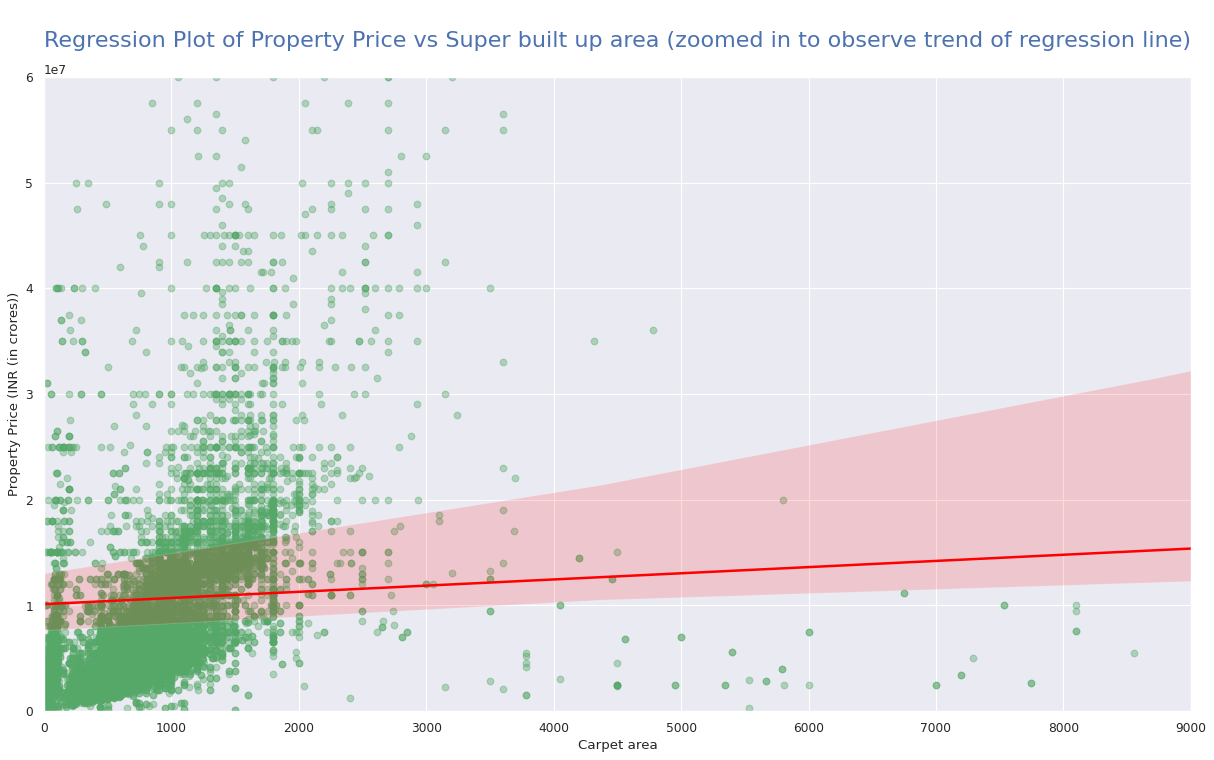

In [ ]:
k = sns.regplot(x='carpet_area (sqft)', y='listing_price', data=carpet_price, color='g', scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
k.figure.set_size_inches(18.5, 10.5)

k.set(ylim=(0,60000000))
k.set(xlim=(0,9000))
k.set_ylabel("Property Price (INR (in crores))")
k.set_xlabel("Carpet area")
k.set_title("\n" + "Regression Plot of Property Price vs Super built up area (zoomed in to observe trend of regression line)" + "\n", fontsize=20, color='b')

***Observation from the Regression Plot - Carpet Area vs Listing Price***:

***1. The regression line appears to have a positive slope -- indicating a positive correlation between carpet area and price***.

***2. Variance is observed at large - this could be the reason for a weak slope.***

# ***Bedroom Count***

In [ ]:
g = df['bedroom_count'].value_counts().to_frame().reset_index()
g.columns = ['Number of bedroom', 'count']
g.head(68)

Number of bedroom  count
0                                             2  11692
1                                             3   8785
2                                             1   4192
3                                             4   1829
4                                             5    382
..                                          ...    ...
63      1   See Dimension    Bedroom 1 9 X 8 ft      1
64    1   See Dimension    Bedroom 1 20 X 10 ft      1
65  1  Bedroom 1 20 X 10 ft Bedroom 2 12 X 9 ft      1
66     1   See Dimension    Bedroom 1 12 X 8 ft      1
67     1   See Dimension    Bedroom 1 12 X 9 ft      1

[68 rows x 2 columns]

***There is a combination of only integers and a combination of characters and integers to represent bedroom count (eg: 2 See Dimension Bedroom 1 10 X 11 ft). We need to manipulate the string character strings to reprsent only the bedroom count number for further analysis.***

In [ ]:
nnn = df[['bedroom_count', 'listing_price']]
nnn = nnn.dropna()

In [ ]:
nnn['num'] = nnn['bedroom_count'].str.replace(' ',"") 
nnn['only_num'] = nnn['num'].str.isdigit()
nnn = nnn[nnn['only_num'] == True]
nnn['num'].unique()

array(['1', '2', '3', '7', '4', '8', '5', '6', '9', '10'], dtype=object)

In [ ]:
bed_num = nnn[['bedroom_count', 'listing_price', 'num']]
bed_num.rename(columns = {'num' : 'only_count_number'}, inplace = True)
bed_num 

bedroom_count  listing_price only_count_number
1                 1   3,000,000.00                 1
2                 1   2,700,000.00                 1
4                 2   4,000,000.00                 2
6                 2   4,200,000.00                 2
8                 3  18,000,000.00                 3
...             ...            ...               ...
42455             3  14,000,000.00                 3
42456             3  12,100,000.00                 3
42458             3  14,500,000.00                 3
42459             2  10,000,000.00                 2
42461             3  13,000,000.00                 3

[27186 rows x 3 columns]

***CASE 1 - case where bedroom count originally did not have dimensions mentioned: We have a dataframe of count of bedrooom numbers***

In [ ]:
bedroom_price = df[['bedroom_count', 'listing_price']]

In [ ]:
bedroom_price['only_count'] = bedroom_price['bedroom_count'].str.rsplit('m',1).str[1]
bedroom_price['only_count'].value_counts()
bedroom_price = bedroom_price.dropna()

 1 10 X 10 ft      39
 1 12 X 12 ft      34
 1 11 X 10 ft      29
 1 12 X 10 ft      27
 1 10 X 12 ft      23
 1 10 X 11 ft      19
 1 11 X 12 ft      18
 1 12 X 11 ft      15
 1 11 X 11 ft      12
 1 12 X 14 ft       6
 1 14 X 10 ft       5
 1 13 X 12 ft       5
 1 15 X 12 ft       4
 1 14 X 12 ft       3
 4 12 X 12 ft       3
 1 10 X 8 ft        3
 1 9 X 9 ft         2
 1 10 X 15 ft       2
 1 12 X 13 ft       2
 2 11 X 13 ft       2
 1 10 X 14 ft       2
 1 15 X 15 ft       2
 2 12 X 9 ft        2
 1 12 X 8 ft        1
 1 9 X 8 ft         1
 3 11 X 11 ft       1
 1 16 X 16 ft       1
 1 10 X 16 ft       1
 1 11 X 9 ft        1
 1 6 X 8 ft         1
 1 14 X 9 ft        1
 1 13 X 14 ft       1
 1 12 X 9 ft        1
 1 12 X 15 ft       1
 1 11 X 10.5 ft     1
 1 13 X 10 ft       1
 1 20 X 10 ft       1
 1 14 X 13 ft       1
 1 14 X 14 ft       1
 1 7.5 X 9 ft       1
 1 8 X 8 ft         1
 1 14 X 8 ft        1
 1 16 X 12 ft       1
 1 13 X 15 ft       1
 1 10 X 13 ft       1
 1 18 X 15

In [ ]:
bedroom_price.tail()

bedroom_count  ...     only_count
42260  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...   4 12 X 12 ft
42266  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...   4 12 X 12 ft
42336  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...   4 12 X 12 ft
42357          1   See Dimension    Bedroom 1 13 X 12 ft  ...   1 13 X 12 ft
42364          1   See Dimension    Bedroom 1 10 X 11 ft  ...   1 10 X 11 ft

[5 rows x 3 columns]

In [ ]:
bedroom_price['only_count_number'] = bedroom_price.only_count.str.get(1)
bedroom_price

bedroom_count  ...  only_count_number
14310        1  Bedroom 1 20 X 10 ft Bedroom 2 12 X 9 ft  ...                  2
14662       1  Bedroom 1 11 X 13 ft Bedroom 2 11 X 13 ft  ...                  2
14714       1  Bedroom 1 11 X 13 ft Bedroom 2 11 X 13 ft  ...                  2
15719           1   See Dimension    Bedroom 1 10 X 8 ft  ...                  1
15849          2   See Dimension    Bedroom 1 10 X 10 ft  ...                  1
...                                                  ...  ...                ...
42260  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
42266  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
42336  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
42357          1   See Dimension    Bedroom 1 13 X 12 ft  ...                  1
42364          1   See Dimension    Bedroom 1 10 X 11 ft  ...                  1

[284 rows x 4 columns]

In [ ]:
bed2_num = bedroom_price.copy()
bed2_num = bed2_num.drop(['only_count'], axis=1)
bed2_num

bedroom_count  ...  only_count_number
14310        1  Bedroom 1 20 X 10 ft Bedroom 2 12 X 9 ft  ...                  2
14662       1  Bedroom 1 11 X 13 ft Bedroom 2 11 X 13 ft  ...                  2
14714       1  Bedroom 1 11 X 13 ft Bedroom 2 11 X 13 ft  ...                  2
15719           1   See Dimension    Bedroom 1 10 X 8 ft  ...                  1
15849          2   See Dimension    Bedroom 1 10 X 10 ft  ...                  1
...                                                  ...  ...                ...
42260  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
42266  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
42336  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
42357          1   See Dimension    Bedroom 1 13 X 12 ft  ...                  1
42364          1   See Dimension    Bedroom 1 10 X 11 ft  ...                  1

[284 rows x 3 columns]

***CASE 2 - case where bedroom count had dimensions mentioned: We now have a dataframe of only the count value of number of bedrooms***

***Merge Case 1 + Case 2 into one dataframe***

In [ ]:
bed3_num = bed_num.append(bed2_num, ignore_index=True)
bed3_num

bedroom_count  ...  only_count_number
0                                                      1  ...                  1
1                                                      1  ...                  1
2                                                      2  ...                  2
3                                                      2  ...                  2
4                                                      3  ...                  3
...                                                  ...  ...                ...
27465  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
27466  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
27467  1       Bedroom 1 12 X 11 ft Bedroom 2 11 X 12...  ...                  4
27468          1   See Dimension    Bedroom 1 13 X 12 ft  ...                  1
27469          1   See Dimension    Bedroom 1 10 X 11 ft  ...                  1

[27470 rows x 3 columns]

**After cleaning the bedroom_count column of unwanted characters, we have a column of just bedroom numbers**

In [ ]:
bed3_num['only_count_number'].unique()

array(['1', '2', '3', '7', '4', '8', '5', '6', '9', '10'], dtype=object)

***Distribution of number of bedrooms in a property***

In [ ]:
bed_group = bed3_num['only_count_number'].value_counts().to_frame().reset_index()
bed_group.columns = ['Number of bedroom', 'count']
bed_group

Number of bedroom  count
0                 2  11586
1                 3   8710
2                 1   4410
3                 4   1810
4                 5    377
5                 6    295
6                 8    112
7                 7     97
8                 9     49
9                10     24

In [ ]:
fig14 = px.pie(bed_group, values="count", names="Number of bedroom", width=1000, height=900, title='Distribution of number of bedroom in each property in Delhi')
fig14.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig14.show(renderer="colab")

***Observations from the distribution of bedrooms:***

***1. Maximum number of properties have 2 bedrooms, followed by 3 bedroom, then 1 bedroom.***

***Relationship between bedroom count and listing price***

In [ ]:
bedroom_lprice = bed3_num[['only_count_number', 'listing_price']]

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

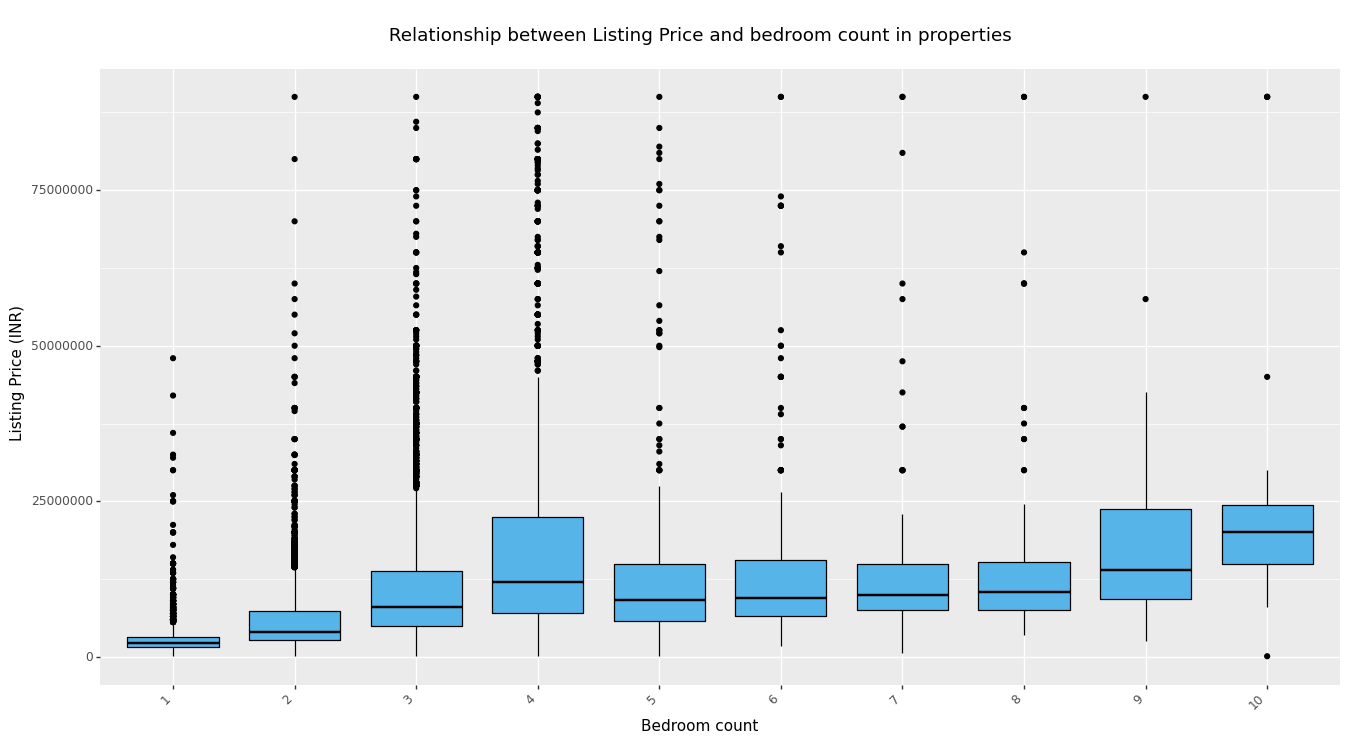

<ggplot: (8789964202653)>

In [ ]:
box9 = ggplot(bedroom_lprice, aes(x = 'only_count_number', y='listing_price')) + geom_boxplot(colour="black", fill="#56B4E9") + ylim(0,90000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Bedroom Count") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and bedroom count in properties \n") + scale_x_discrete(name="Bedroom count",
                    limits=("1","2","3","4","5","6","7","8","9","10"))
plt.figure(figsize=(20,20)) 
box9

***Observation from relationship between bedroom count and listing price***:

***1. There seems to be an overall trend of increase in listing price with increase in bedroom count***

***2. Anomaly observed: Properties with 4 bedrooms seem to have a higher median price than properties with 5, 6, 7, 8 bedrooms. They also have a comparitively higher variance - with a positive skew - what is the reason for this anomaly?***

# ***Bathroom coount***

In [ ]:
bath = df['bathroom_count'].value_counts().to_frame().reset_index()
bath.columns = ['Number of bathroom', 'count']
bath.head(68)

Number of bathroom  count
0                   2  14048
1                   1   7818
2                   3   3618
3                   4    819
4                2.00    356
5                3.00    321
6                   5    197
7                4.00    150
8                   6    111
9                1.00     55
10               5.00     45
11                  8     40
12                  7     28
13                  9     22
14                 10     17
15               > 10     11
16               6.00      6
17               7.00      2
18              10.00      1

In [ ]:
fig4 = px.pie(bath, values="count", names="Number of bathroom", width=1000, height=900, title='Distribution of number of bathrooms in each property in Delhi')
fig4.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig4.show(renderer="colab")

***Observation from distribution of bathroom count in Delhi***:

1***. More than 50% of the listed properties have 2 bathrooms in them.***

***2. Properties with bathroom count 5-10+ have a very small share of each category,  having less than 1% share.***

***Relationship between number of bathroom in a property and its listing price***

In [ ]:
bath_price = df[['bathroom_count', 'listing_price']]
bath_price['bathroom_count'].unique()

array([nan, '1', '2', '3', '5', '4', '7', '10', '9', '6', '> 10', '8',
       3.0, 2.0, 1.0, 6.0, 4.0, 5.0, 7.0, 10.0], dtype=object)

In [ ]:
bath_price['bathroom_count'] =  bath_price['bathroom_count'].str.replace('1.0',"1") 
bath_price['bathroom_count'] =  bath_price['bathroom_count'].str.replace('2.0',"2") 
bath_price['bathroom_count'] =  bath_price['bathroom_count'].str.replace('3.0',"3") 
bath_price['bathroom_count'] =  bath_price['bathroom_count'].str.replace('4.0',"4") 
bath_price['bathroom_count'] =  bath_price['bathroom_count'].str.replace('5.0',"5") 
bath_price['bathroom_count'] =  bath_price['bathroom_count'].str.replace('6.0',"6") 
bath_price['bathroom_count'] =  bath_price['bathroom_count'].str.replace('7.0',"7") 
bath_price['bathroom_count'] =  bath_price['bathroom_count'].str.replace('10.0',"10") 
bath_price = bath_price.dropna()

bath_price = bath_price.sort_values(by = 'bathroom_count')

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

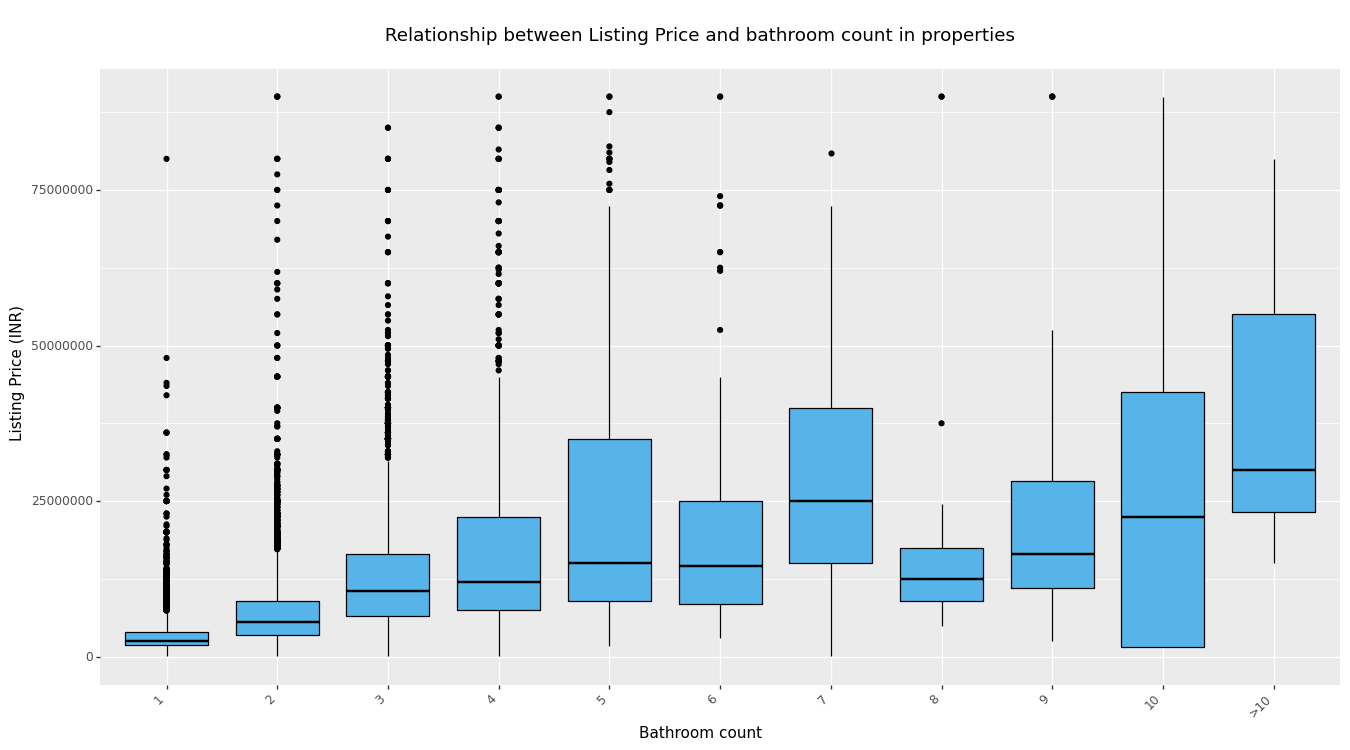

<ggplot: (8789961659085)>

In [ ]:
box4 = ggplot(bath_price, aes(x = 'bathroom_count', y='listing_price')) + geom_boxplot(colour="black", fill="#56B4E9") + ylim(0,90000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Bathroom Count") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and bathroom count in properties \n") + scale_x_discrete(name="Bathroom count",
                    limits=("1","2","3","4","5","6","7","8","9","10",">10"))
plt.figure(figsize=(20,20)) 
box4

***Observation from relationship between bathroom count and listing price***:

***1. There seems to be an overall trend of increase in listing price with an increase in bathroom count + an overall trend of positive skew in prices of bathroom counts***

***2. Observed anomaly: Properties with 8 bathooms have median prices lesser than properties with 7 and 6 bathrooms; Properties with 9 bathooms have median prices lesser than properties with 7 bathrooms -- what is the reason for this anomaly?***

***3. Properties with 10 bathroom count have the highest variance***

# ***Balcony Count***

In [ ]:
balcony = df['balcony_count'].value_counts().to_frame().reset_index()
balcony.columns = ['balcony_count', 'count']
balcony

balcony_count  count
0              1  10108
1              2   5214
2              3   1269
3              4    377
4           1.00    279
5           3.00    271
6           2.00    244
7              5     84
8           4.00     82
9              6     34
10          5.00     23
11             8      9
12          6.00      6
13             7      5
14            10      4
15          7.00      3
16         10.00      2
17       10-plus      1

In [ ]:
balcony['balcony_count'] =  balcony['balcony_count'].str.replace('1.0',"1") 
balcony['balcony_count'] =  balcony['balcony_count'].str.replace('2.0',"2") 
balcony['balcony_count'] =  balcony['balcony_count'].str.replace('3.0',"3") 
balcony['balcony_count'] =  balcony['balcony_count'].str.replace('4.0',"4") 
balcony['balcony_count'] =  balcony['balcony_count'].str.replace('5.0',"5") 
balcony['balcony_count'] =  balcony['balcony_count'].str.replace('6.0',"6") 
balcony['balcony_count'] =  balcony['balcony_count'].str.replace('7.0',"7") 
balcony['balcony_count'] =  balcony['balcony_count'].str.replace('10.0',"10") 
balcony = balcony.dropna()

In [ ]:
fig9 = px.pie(balcony, values="count", names="balcony_count", width=1000, height=900, title='Distribution of number of balcony in each property in Delhi')
fig9.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig9.show(renderer="colab")

***Observation from distribution of balcony counts in properties***:

***1. About 60% of the listed properties have only 1 balcony, leading the distribution count -- this is nearly twice the number of the proportion of properties with 2 balconies***.

***2. Properties with balcony count 5-10+ have a very small share of each category,  having less than 1% share.***

***Relationship between number of balcony in a property and its listing price***

In [ ]:
%%capture
balcony_price = df[['balcony_count', 'listing_price']]
balcony_price['balcony_count'].unique()

In [ ]:
balcony_price['balcony_count'].unique()

array([nan, '1', '2', '3', '4', '6', '5', '10', '8', '7', 2.0, 1.0, 6.0,
       3.0, 4.0, 5.0, 7.0, 10.0, '10-plus'], dtype=object)

In [ ]:
balcony_price['balcony_count'] =  balcony_price['balcony_count'].str.replace('1.0',"1") 
balcony_price['balcony_count'] =  balcony_price['balcony_count'].str.replace('2.0',"2") 
balcony_price['balcony_count'] =  balcony_price['balcony_count'].str.replace('3.0',"3") 
balcony_price['balcony_count'] =  balcony_price['balcony_count'].str.replace('4.0',"4") 
balcony_price['balcony_count'] =  balcony_price['balcony_count'].str.replace('5.0',"5") 
balcony_price['balcony_count'] =  balcony_price['balcony_count'].str.replace('6.0',"6") 
balcony_price['balcony_count'] =  balcony_price['balcony_count'].str.replace('7.0',"7") 
balcony_price['balcony_count'] =  balcony_price['balcony_count'].str.replace('10.0',"10") 
balcony_price = balcony_price.dropna()
balcony_price['balcony_count'].unique()

array(['1', '2', '3', '4', '6', '5', '10', '8', '7', '10-plus'],
      dtype=object)

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

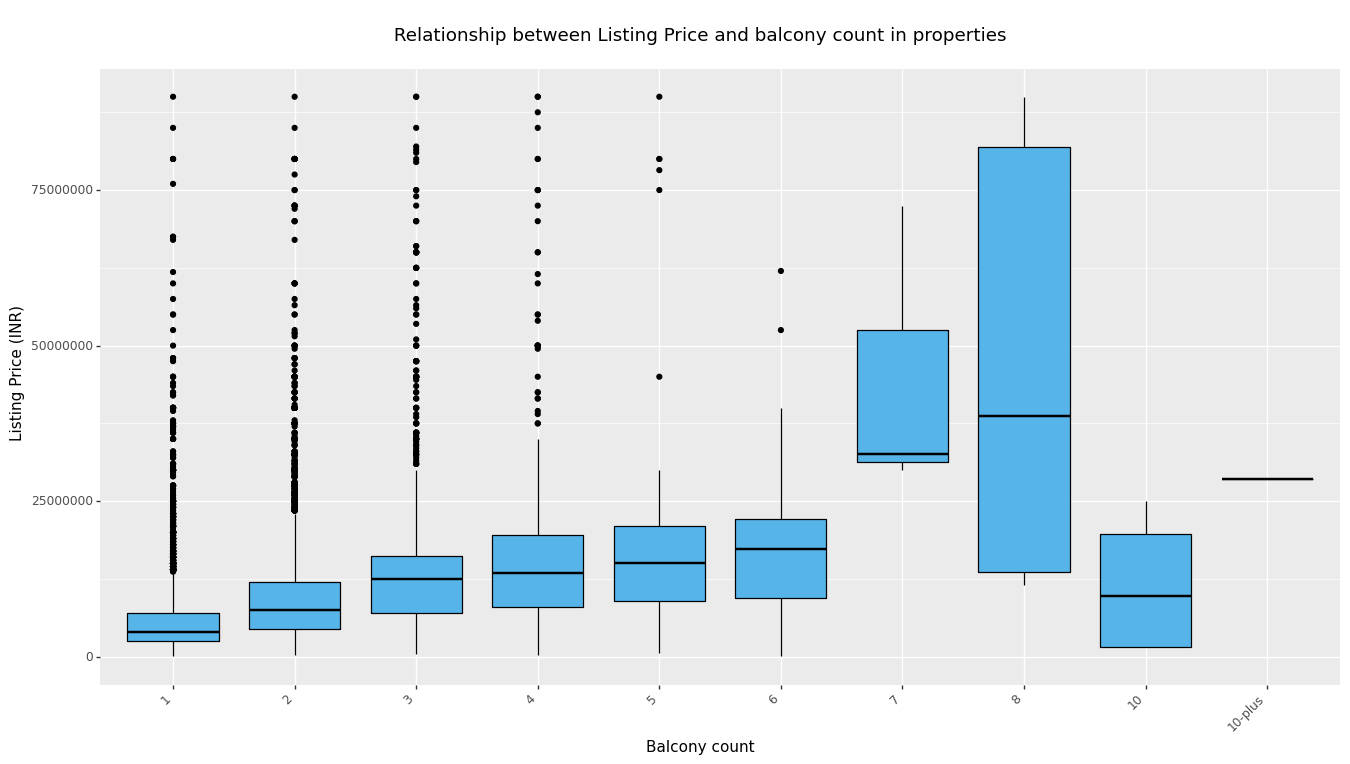

<ggplot: (8789961423825)>

In [ ]:
box5 = ggplot(balcony_price, aes(x = 'balcony_count', y='listing_price')) + geom_boxplot(colour="black", fill="#56B4E9") + ylim(0,90000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Balcony Count") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and balcony count in properties \n") + scale_x_discrete(name="Balcony count",
                    limits=("1","2","3","4","5","6","7","8","10","10-plus"))
plt.figure(figsize=(20,20)) 
box5

***Observation from relationship between balcony count and listing price***:

***1. There seems to be an overall trend of increase in mdian listing price with an increase in balcony count till balcony count of 8***.

# ***Floor***

In [ ]:
df['floor'].unique

<bound method Series.unique of 0                        NaN
1        3 (Out of 4 Floors)
2        1 (Out of 5 Floors)
3                        NaN
4        3 (Out of 3 Floors)
                ...         
42456    1 (Out of 6 Floors)
42458    4 (Out of 8 Floors)
42459    1 (Out of 4 Floors)
42460                    NaN
42461    3 (Out of 6 Floors)
Name: floor, Length: 31373, dtype: object>

In [ ]:
floor_price = df[['floor', 'listing_price']]

In [ ]:
floor_price['only_floor'] = df['floor'].str.split('(').str[0]
floor_price

floor  listing_price only_floor
0                      NaN   1,200,000.00        NaN
1      3 (Out of 4 Floors)   3,000,000.00         3 
2      1 (Out of 5 Floors)   2,700,000.00         1 
3                      NaN  16,000,000.00        NaN
4      3 (Out of 3 Floors)   4,000,000.00         3 
...                    ...            ...        ...
42456  1 (Out of 6 Floors)  12,100,000.00         1 
42458  4 (Out of 8 Floors)  14,500,000.00         4 
42459  1 (Out of 4 Floors)  10,000,000.00         1 
42460                  NaN  45,000,000.00        NaN
42461  3 (Out of 6 Floors)  13,000,000.00         3 

[31373 rows x 3 columns]

In [ ]:
floor_price.dropna()

floor  listing_price only_floor
1       3 (Out of 4 Floors)   3,000,000.00         3 
2       1 (Out of 5 Floors)   2,700,000.00         1 
4       3 (Out of 3 Floors)   4,000,000.00         3 
6       4 (Out of 5 Floors)   4,200,000.00         4 
8      8 (Out of 18 Floors)  18,000,000.00         8 
...                     ...            ...        ...
42455   7 (Out of 9 Floors)  14,000,000.00         7 
42456   1 (Out of 6 Floors)  12,100,000.00         1 
42458   4 (Out of 8 Floors)  14,500,000.00         4 
42459   1 (Out of 4 Floors)  10,000,000.00         1 
42461   3 (Out of 6 Floors)  13,000,000.00         3 

[25776 rows x 3 columns]

In [ ]:
floor_price['only_floor'].unique()

array([nan, '3 ', '1 ', '4 ', '8 ', '2 ', 'Ground ', '12 ',
       'Upper Basement ', '13 ', '11 ', '5 ', '6 ', '10 ', '3', '7 ',
       '14 ', '18 ', 'Lower Basement ', '9 ', '15 ', '19 ', '34 ', '20 ',
       '21 ', '17 ', '2', '1', 'Ground', '28', '16 ', '4', '24 ',
       'Lower Basement', '25 ', 'Upper Basement', '23 ', '22 ', '26 ',
       '28 '], dtype=object)

In [ ]:
floor_price['only_floor'] =  floor_price['only_floor'].str.strip()
floor_price = floor_price.dropna()
floor_price['only_floor'].unique()

array(['3', '1', '4', '8', '2', 'Ground', '12', 'Upper Basement', '13',
       '11', '5', '6', '10', '7', '14', '18', 'Lower Basement', '9', '15',
       '19', '34', '20', '21', '17', '28', '16', '24', '23', '25', '22',
       '26'], dtype=object)

In [ ]:
floor_dist = floor_price['only_floor'].value_counts().to_frame().reset_index()
floor_dist.columns = ['floor_count', 'count']
floor_dist

floor_count  count
0                1   7362
1                2   6010
2                3   5002
3           Ground   4047
4                4   2124
5                5    318
6   Upper Basement    171
7                6    167
8                7    154
9                8    101
10  Lower Basement     73
11               9     60
12              10     48
13              12     28
14              11     24
15              14     20
16              15     12
17              20     11
18              13      9
19              18      7
20              17      5
21              21      5
22              19      4
23              34      2
24              16      2
25              26      2
26              28      2
27              23      2
28              24      2
29              22      1
30              25      1

***The top 15 groups of number of floor seem to have a reasonable share to display the distribution.***

In [ ]:
floor_dist_15 = floor_dist.head(15)
fig20 = px.pie(floor_dist_15, values="count", names="floor_count", width=1000, height=900, title='Distribution of the floor in which the property is')
fig20.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig20.show(renderer="colab")

***Observation of the distribution of floors on which the properties are situated on***:

***1. Most of the listed properties seems to be situated on the following floors (by order of count): 1st floor, 2nd floor, 3rd floor, Ground floor***

***2. Properties on floor 5-11 + Upper and lower basement have very minimal share of the listed properties of less than 1% each***.

***Relationship between listing price and floor on which the property is present***

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

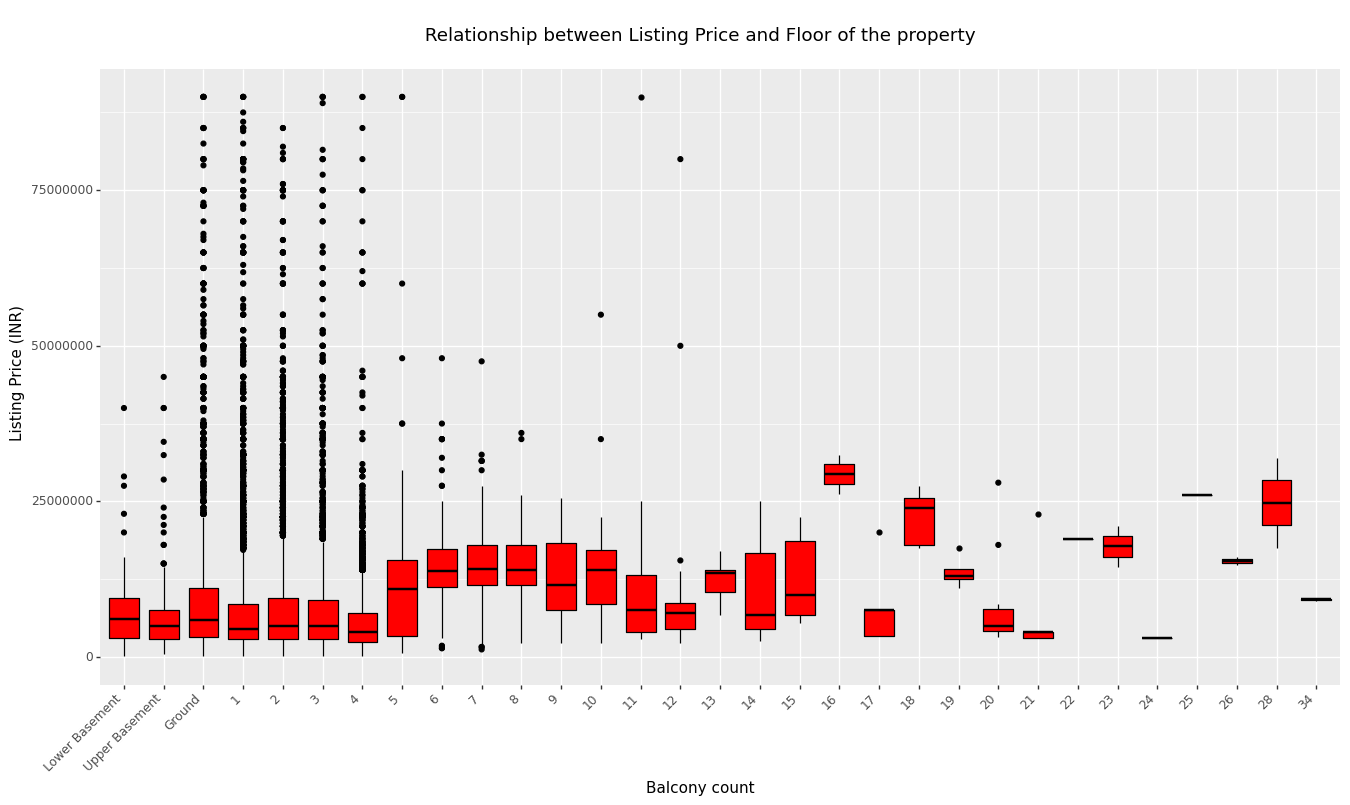

<ggplot: (8789961678933)>

In [ ]:
box5 = ggplot(floor_price, aes(x = 'only_floor', y='listing_price')) + geom_boxplot(colour="black", fill="red") + ylim(0,90000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Floor") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Floor of the property \n") + scale_x_discrete(name="Balcony count",
                    limits=("Lower Basement", "Upper Basement", "Ground", "1","2","3","4","5","6","7","8","9", "10","11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "28", "34"))
plt.figure(figsize=(20,20)) 
box5

***Zooming in further to observe median prices***

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

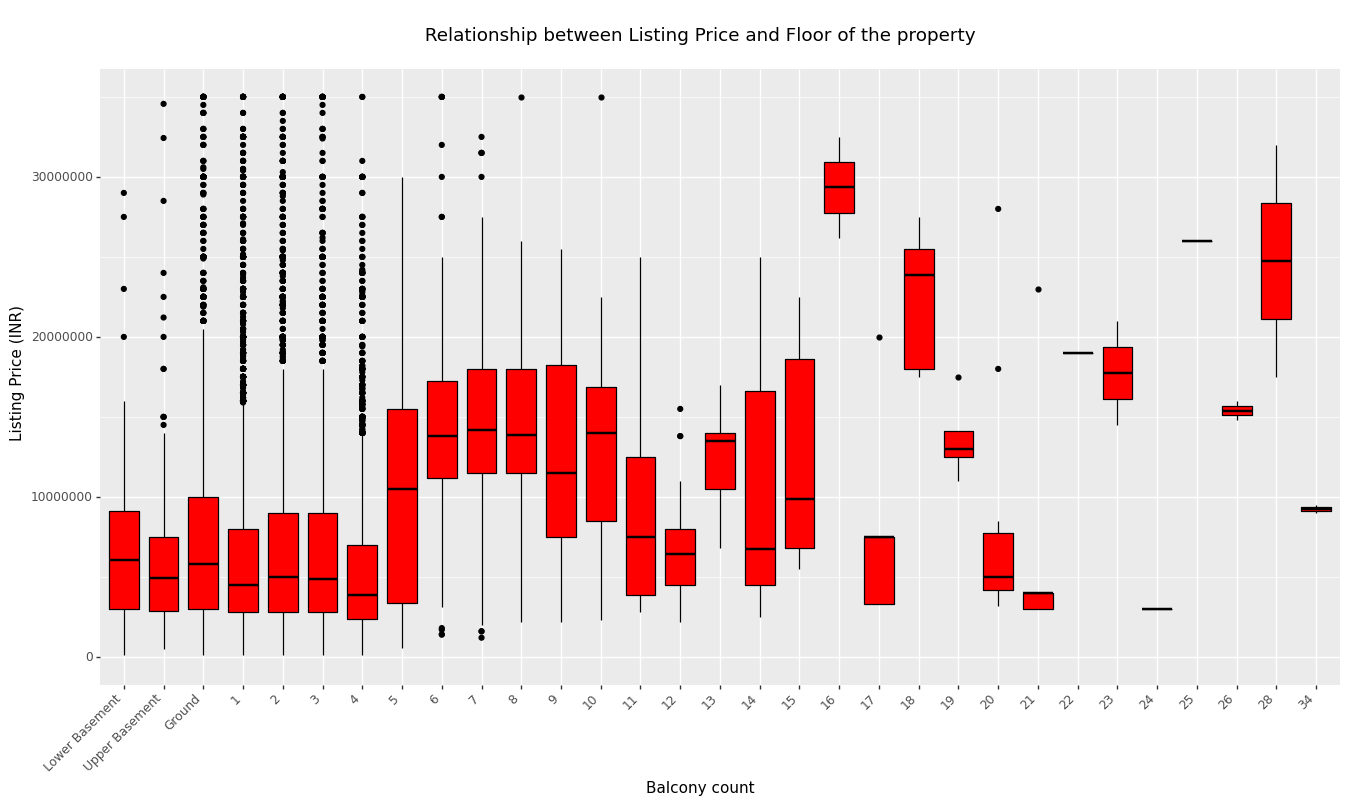

<ggplot: (8789961537633)>

In [ ]:
box5 = ggplot(floor_price, aes(x = 'only_floor', y='listing_price')) + geom_boxplot(colour="black", fill="red") + ylim(0,35000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Floor") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Floor of the property \n") + scale_x_discrete(name="Balcony count",
                    limits=("Lower Basement", "Upper Basement", "Ground", "1","2","3","4","5","6","7","8","9", "10","11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "28", "34"))
plt.figure(figsize=(20,20)) 
box5

***Observations from rlationship between floor and listing price***:

***1. Properties on ground floor and lower basement have higher median prices than properties on floor 1 - 4***.

***2. From properties on fifth floor and higher, there is a surge in increase in median prices.*** 

***3. Properties on floor 6, 7, 8 have higher median prices than properties on floor 5 and 9.***

***4. There is an overall trend of higher variance in properties listed on higher floors.***

***5. There is no apparent trend to conclude that properties on higher or lower floors have higher listing price - this can be due to the variance in listing prices and unequal distribution of properties based on their floors.***

# ***Furnished Status***

In [ ]:
df['furnished_status'].unique()

array([nan, 'Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [ ]:
furn_price = df[['furnished_status', 'listing_price']]
furn_price = furn_price.dropna()

In [ ]:
print ("\nDistribution of furnished status in properties \n")
q = furn_price['furnished_status'].value_counts().to_frame().reset_index()
q = q.rename(columns={'index':'furn_status', 'furnished_status':'count'})
q


Distribution of furnished status in properties 



furn_status  count
0  Semi-Furnished   6336
1     Unfurnished   4233
2       Furnished   2004

***Distribution of furnished status among the listed properties in Delhi***

In [ ]:
fig4 = px.pie(q, values="count", names="furn_status", width=1000, height=900, title='Distribution of Furnished Status in Delhi by Count')
fig4.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig4.show(renderer="colab")

***Observation from distribution of furnishing status in properties***:

***1. Semi-furnished properties take up about 50% of the listed properties -- folowed by unfurnished -- and lastly furnished***

***Relationship between listing price and furnishing status***

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

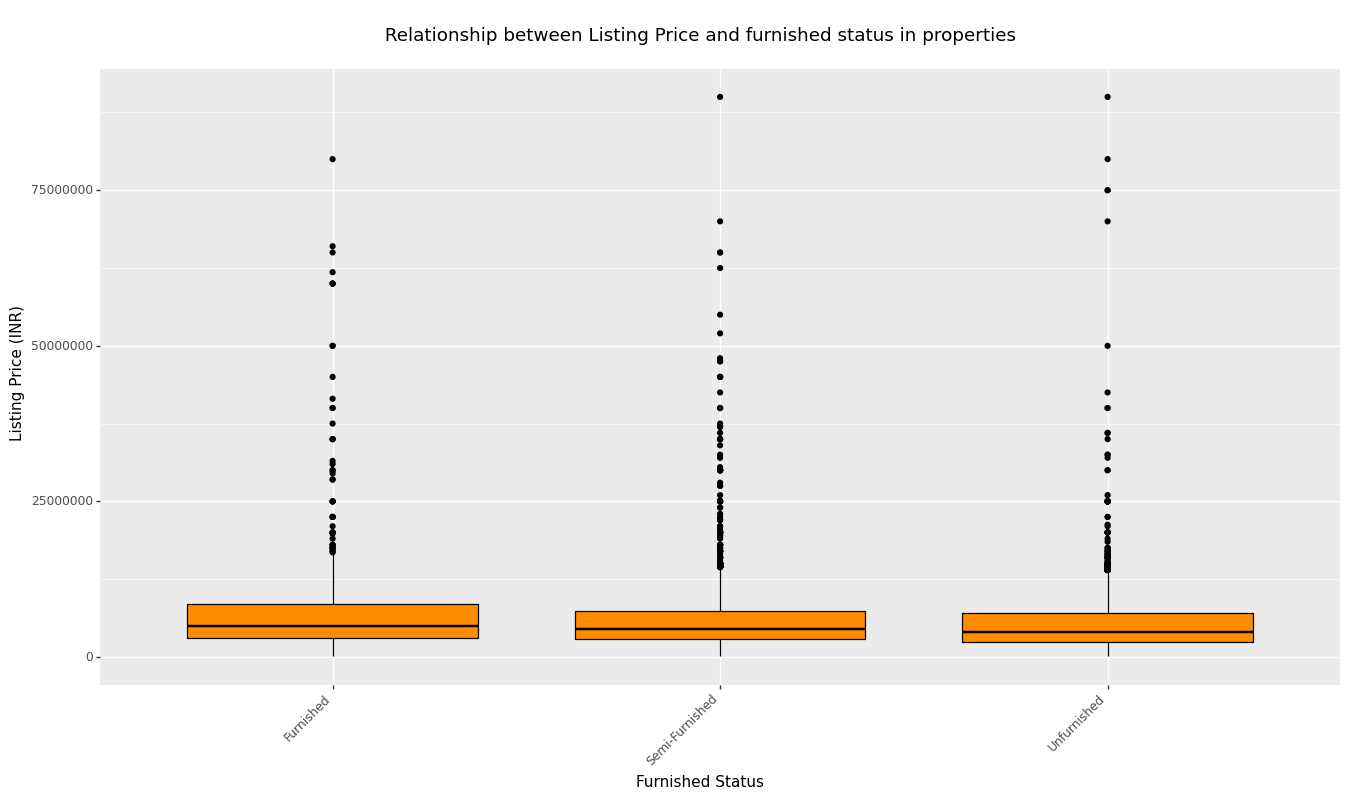

<ggplot: (8789960564233)>

In [ ]:
box6 = ggplot(furn_price, aes(x = 'furnished_status', y='listing_price')) + geom_boxplot(colour="black", fill="darkorange") + ylim(0,90000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Furnished Status") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and furnished status in properties \n") 
plt.figure(figsize=(20,20)) 
box6

***Zoomed in to observe median price values***

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

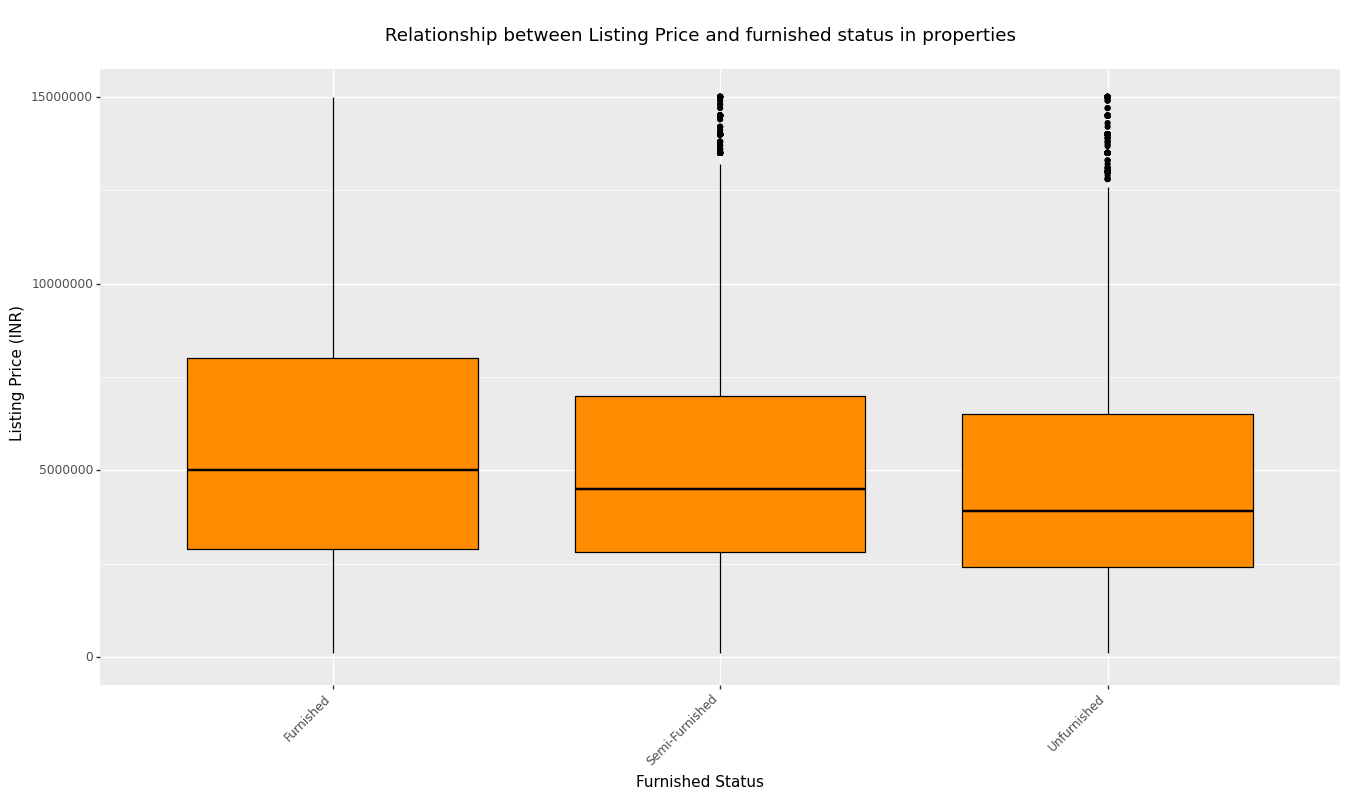

<ggplot: (8789960741081)>

In [ ]:
box6 = ggplot(furn_price, aes(x = 'furnished_status', y='listing_price')) + geom_boxplot(colour="black", fill="darkorange") + ylim(0,15000000) + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + theme(figure_size=(16, 8)) + xlab("Furnished Status") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and furnished status in properties \n") 
plt.figure(figsize=(20,20)) 
box6

***Observations from relationship between furnished status and listing price***:

***1. Furnished properties have the highest median listing price -- followed by semi-furnished -- and finally furnished properties.***

# ***Any construction done***

In [ ]:
any_const = df[['any_construction_done', 'listing_price']]
any_const

any_construction_done  listing_price
0                        No   1,200,000.00
1                       NaN   3,000,000.00
2                       NaN   2,700,000.00
3                        No  16,000,000.00
4                       NaN   4,000,000.00
...                     ...            ...
42456                   NaN  12,100,000.00
42458                   NaN  14,500,000.00
42459                   NaN  10,000,000.00
42460                   Yes  45,000,000.00
42461                   NaN  13,000,000.00

[31373 rows x 2 columns]

In [ ]:
any_const['any_construction_done'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [ ]:
any_const = any_const.dropna()

***Distribution of construction done in properties***

In [ ]:
print ("\nDistribution of construction done in properties \n")
q2 = any_const['any_construction_done'].value_counts().to_frame().reset_index()
q2 = q2.rename(columns={'index':'const_status', 'any_construction_done':'count'})
q2


Distribution of construction done in properties 



const_status  count
0           No   1795
1          Yes    940

***Out of all the property records for Delhi, there is records available for a total of 11 properties for construction done -- It has 91% missing values -- hence this cannot be taken as an important feature for further analysis***

# ***Possession Status***

In [ ]:
df[['possession_status', 'listing_price']]

possession_status  listing_price
0                   NaN   1,200,000.00
1                   NaN   3,000,000.00
2         Ready to Move   2,700,000.00
3                   NaN  16,000,000.00
4         Ready to Move   4,000,000.00
...                 ...            ...
42456     Ready to Move  12,100,000.00
42458     Ready to Move  14,500,000.00
42459     Ready to Move  10,000,000.00
42460               NaN  45,000,000.00
42461     Ready to Move  13,000,000.00

[31373 rows x 2 columns]

In [ ]:
df['possession_status'].unique()

array([nan, 'Ready to Move', 'Possession by Apr @21',
       'Possession by Jun @21', 'Possession by May @21',
       'Possession by Oct @21', 'Possession by Jul @24',
       'Possession by Mar @22', 'Possession by Jul @21',
       'Possession by Dec @21', 'Possession by Sep @21',
       'Possession by Mar @23', 'Possession by Dec @23',
       'Possession by Aug @21', 'Immediately', 'Possession by Apr @22',
       'Possession by Mar @21', 'Possession by Dec @22',
       'Possession by Nov @21', 'Possession by Jan @22',
       'Possession by Jun @22', 'Possession by Feb @26',
       'Possession by Aug @22', 'Possession by May @22',
       'Possession by Feb @22', 'Possession by Jan @24',
       'Possession by Jun @24', 'Possession by May @26'], dtype=object)

In [ ]:
possession_group = df.groupby('possession_status', as_index=False)['geo_division'].count() 
possession_group.rename(columns = {'geo_division' : 'Total count'}, inplace = True)
possession_group = possession_group.sort_values(by='Total count', ascending=False)
possession_group_20 = possession_group.head(20)
print("\033[1m" + "Top 20 Listed localities in Delhi with their count" + "\033[0m" + "\n")
possession_group_20

Top 20 Listed localities in Delhi with their count



possession_status  Total count
26          Ready to Move        27291
1   Possession by Apr @21           21
14  Possession by Jun @21           15
20  Possession by May @21           12
5   Possession by Dec @21            8
12  Possession by Jul @21            6
3   Possession by Aug @21            5
23  Possession by Nov @21            4
17  Possession by Mar @21            4
0             Immediately            4
18  Possession by Mar @22            3
25  Possession by Sep @21            3
24  Possession by Oct @21            3
19  Possession by Mar @23            2
2   Possession by Apr @22            2
22  Possession by May @26            2
10  Possession by Jan @22            2
16  Possession by Jun @24            2
7   Possession by Dec @23            2
6   Possession by Dec @22            1

In [ ]:
fig6 = px.pie(possession_group_20, values="Total count", names="possession_status", width=1000, height=900, title='Distribution of Possession status in properties in Delhi by Count (Top 20)')
fig6.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig6.show(renderer="colab")

***Observation from the distribution of Possession Status in listed properties***:

1. ***About 99% of the properties listed are 'Ready to Move properties'***

***With one category of Possession Status (i.e Ready to Move properties) taking up 99% of the listed properties, an accurate relationship between the listing price among the entirety of possession status categories cannot be established.***

***Hence, we will not be moving forward with the graphical analysis to establish their relationship.***

# ***Approving Authority***

In [ ]:
approv_auth = df['approving_authority'].value_counts().to_frame().reset_index()
approv_auth = approv_auth.rename(columns={'index':'approving_authority', 'approving_authority':'count'})
approv_auth = approv_auth.dropna()
approv_auth

approving_authority  count
0                         Delhi Development Authority   2236
1                      Municipal Corporation of Delhi   1196
2                    RWA/Co-operative Housing Society    801
3                                           Developer    772
4                               Development Authority    669
5                          City Municipal Corporation    640
6                         New Delhi Municipal Council    153
7   Bangalore International Airport Area Planning ...      2
8             Municipal Corporation of Greater Mumbai      2
9   Hyderabad Metropolitan Development Authority, ...      2
10         Developer, Bangalore Development Authority      2
11  Hyderabad Metropolitan Development Authority, ...      2
12  Hyderabad Metropolitan Development Authority, ...      1
13                    Bangalore Development Authority      1
14  Greater Hyderabad Municipal Corporation, Banga...      1
15       Hyderabad Metropolitan Development Authority      1
16  Developer, Bangalore International Airport Are...      1
17                       Jaipur Development Authority      1

We notice that only the top 6 listed authorities have a substantial amount of count - hence we will use them for further analysis.

In [ ]:
approv_auth_h = approv_auth.head(6)
approv_auth_h

approving_authority  count
0       Delhi Development Authority   2236
1    Municipal Corporation of Delhi   1196
2  RWA/Co-operative Housing Society    801
3                         Developer    772
4             Development Authority    669
5        City Municipal Corporation    640

In [ ]:
fig10 = px.pie(approv_auth_h, values="count", names="approving_authority", width=1000, height=900, title='Distribution of approving authorities of properties')
fig10.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig10.show(renderer="colab")

***Observations from the distribution of Approving Authorities for properties in Delhi***:

1. ***Delhi Development Authority leads the countol for approving the most number of the listed properties (35.4%) - followed by Municipal Corporation of Delhi (18.9%) -- then RWA/Co-operative Housing Society (12.7%)***

***Relationship between Approving Authority and Listing Price***

In [ ]:
app_price = df[['approving_authority', 'listing_price']]
app_price = app_price.dropna()

In [ ]:
app_price = app_price[(app_price['approving_authority'].isin(['Delhi Development Authority','Municipal Corporation of Delhi', 'RWA/Co-operative Housing Society', 'Developer', 'Development Authority', 'City Municipal Corporation'])) ]


In [ ]:
app_price['approving_authority'].unique()

array(['Municipal Corporation of Delhi', 'City Municipal Corporation',
       'Development Authority', 'Delhi Development Authority',
       'Developer', 'RWA/Co-operative Housing Society'], dtype=object)

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

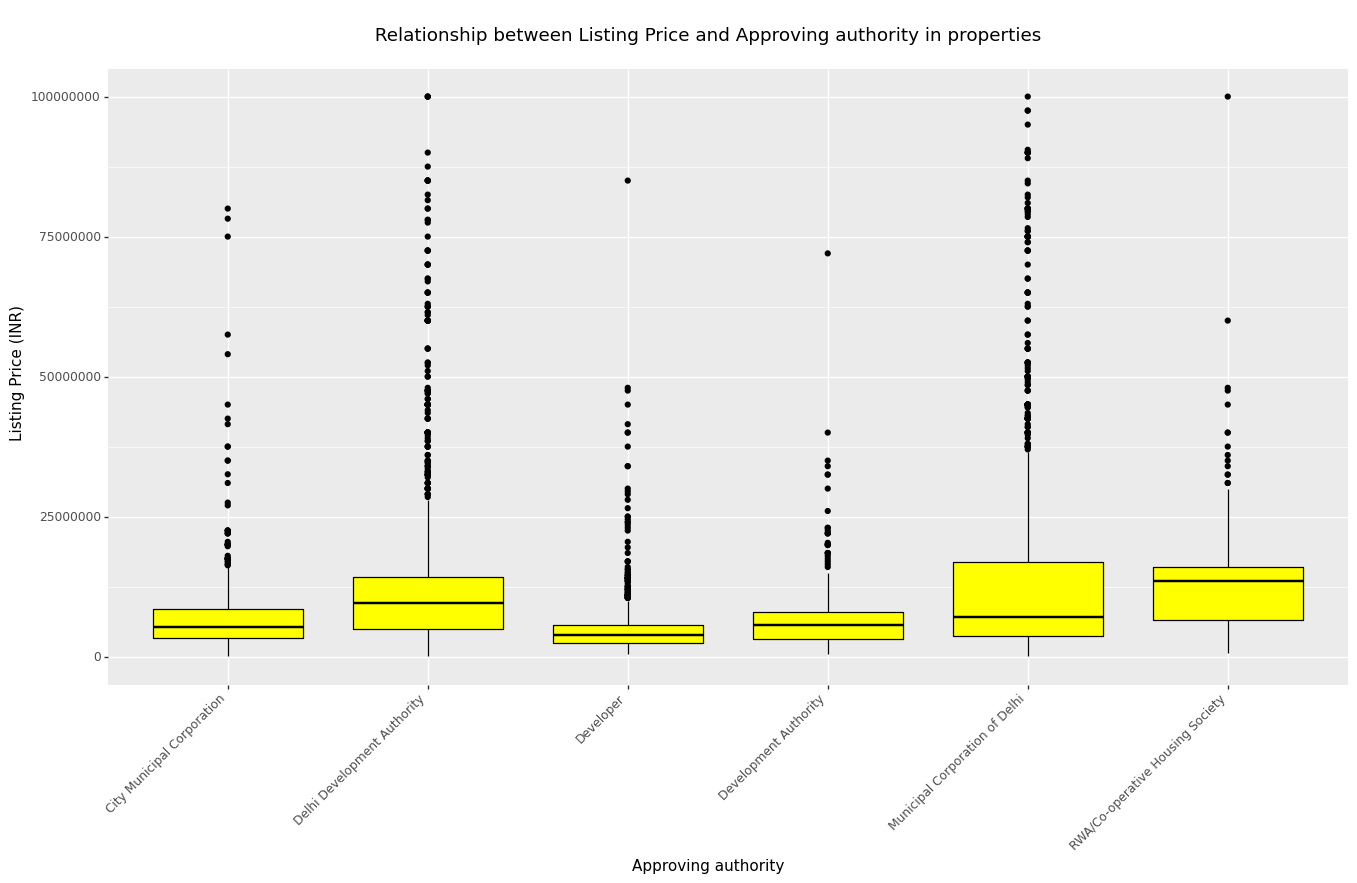

<ggplot: (8789960675081)>

In [ ]:
box10 = ggplot(app_price, aes(x = 'approving_authority', y='listing_price')) + geom_boxplot(colour="black", fill="yellow") + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + ylim(0,100000000) + theme(figure_size=(16, 8)) + xlab("Approving authority") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Approving authority in properties \n") 
plt.figure(figsize=(15,15)) 
box10

***Zooming in to observe the median prices of different approving authorities***

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

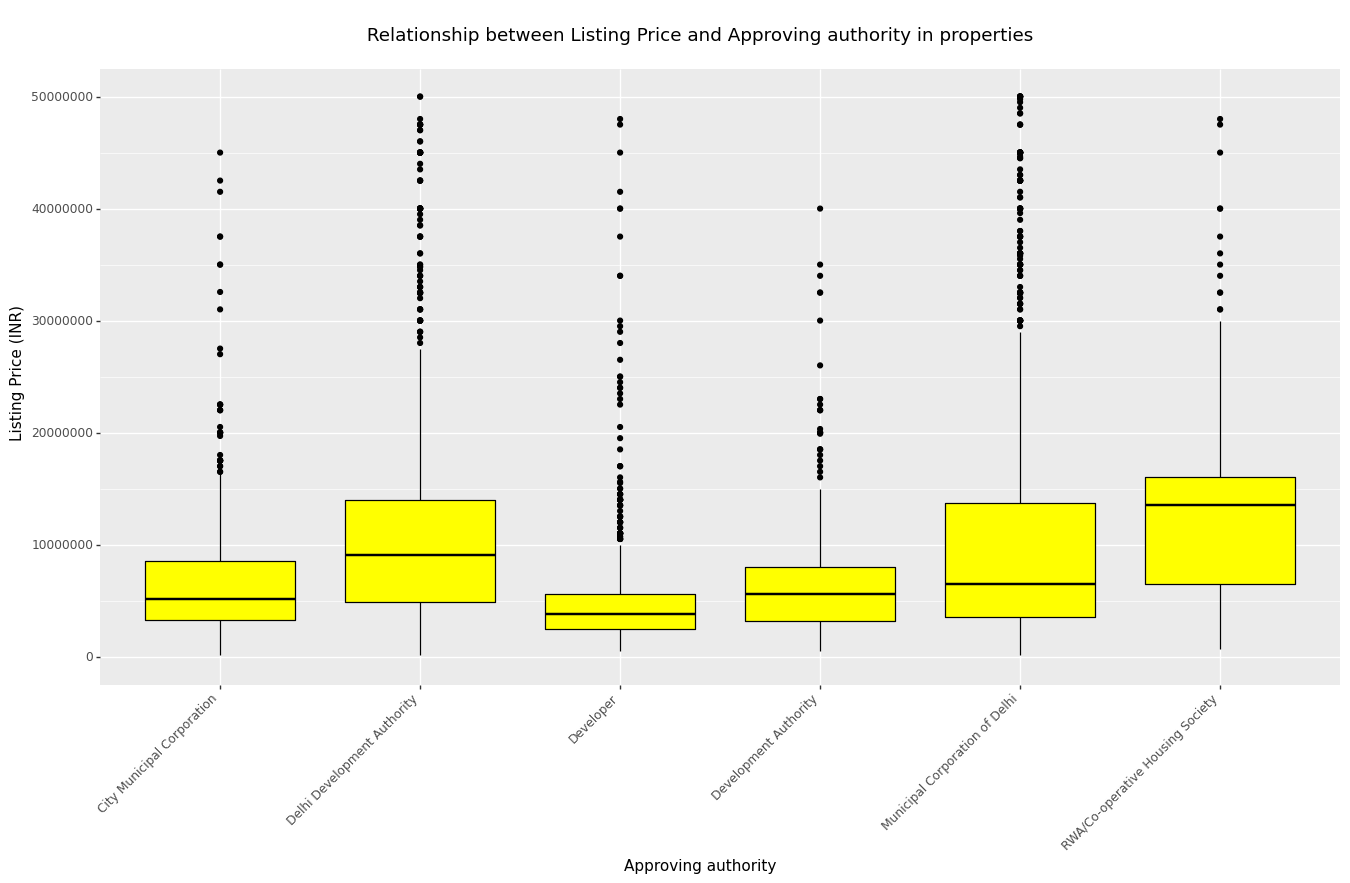

<ggplot: (8789960472569)>

In [ ]:
box10 = ggplot(app_price, aes(x = 'approving_authority', y='listing_price')) + geom_boxplot(colour="black", fill="yellow") + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + ylim(0,50000000) + theme(figure_size=(16, 8)) + xlab("Approving authority") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Approving authority in properties \n") 
plt.figure(figsize=(15,15)) 
box10

***Observations from the visual representation of relationship between approving authority and listing price***:

**1. Properties approved by the RWA/Co-operative Housing Society seem to have the highest median price -- followed by Delhi Development Authority**.

***2. Prices of properties approved by RWA/Co-op are skewed to the left.***

***3. Properties approved by Developers seems to have the lowest median price among the top 6 listed authorities by count***.

# ***Listing Authority***

In [ ]:
df['listing_authority'].unique()

array(['Owner', 'Agent', 'Builder'], dtype=object)

In [ ]:
list_auth = df['listing_authority'].value_counts().to_frame().reset_index()
list_auth = list_auth.rename(columns={'index':'listing_authority', 'listing_authority':'count'})
list_auth = list_auth.dropna()
list_auth

listing_authority  count
0             Owner  26454
1             Agent   4901
2           Builder     18

In [ ]:
fig11 = px.pie(list_auth, values="count", names="listing_authority", width=1000, height=900, title='Distribution of listing authority of properties')
fig11.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))
fig11.show(renderer="colab")

Observation from distribution of listing authorities of properties:

1. 
2. 

***Relationship between listing authority and listing price***

In [ ]:
lis_price = df[['listing_authority', 'listing_price']]
lis_price = lis_price.dropna()

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

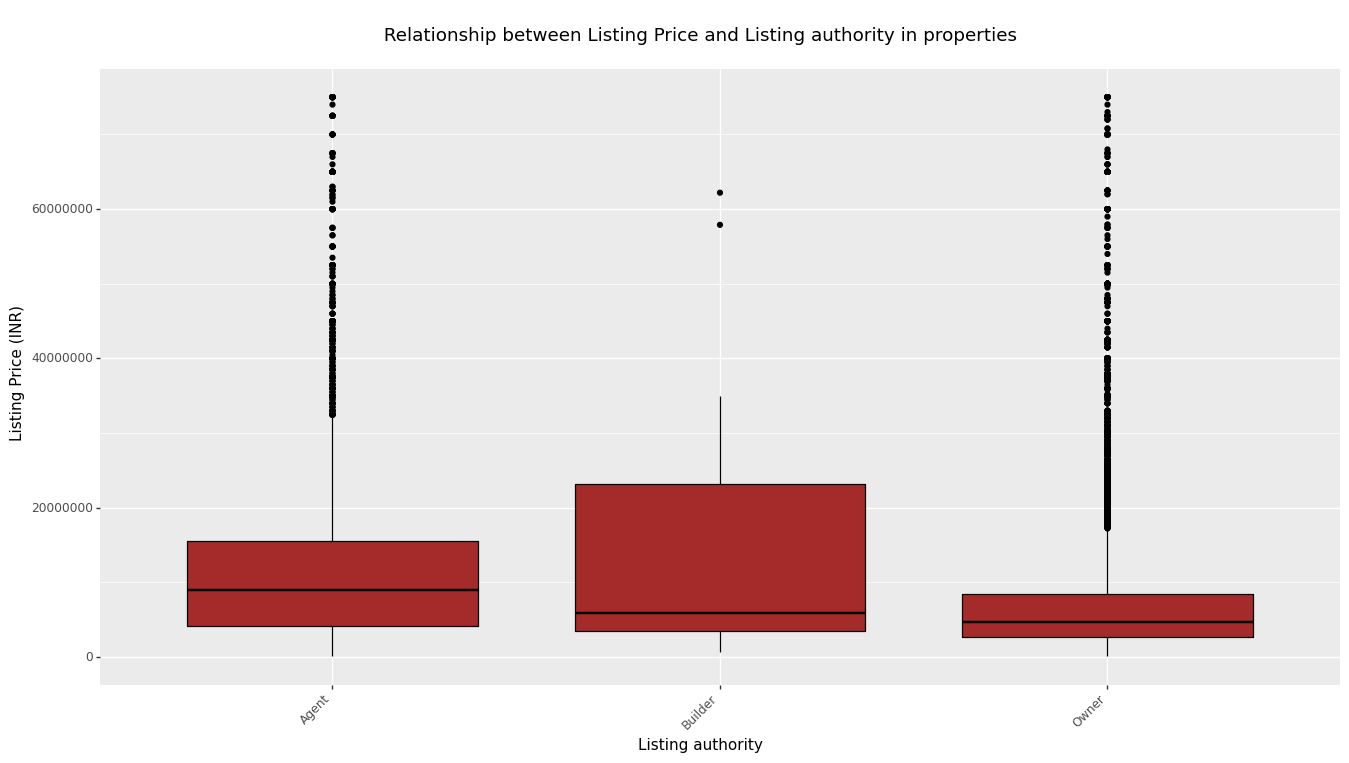

<ggplot: (8789960380393)>

In [ ]:
box11 = ggplot(lis_price, aes(x = 'listing_authority', y='listing_price')) + geom_boxplot(colour="black", fill="brown") + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + ylim(0,75000000) + theme(figure_size=(16, 8)) + xlab("Listing authority") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Listing authority in properties \n") 
plt.figure(figsize=(15,15)) 
box11

***Observations from graphical representation of relationship between listing authority and listing price***:

***1. Properties listed by Agent's have the highest median price, followed by properties listed by Builders.***

***2. Properties listed by Builders have higher variance in listing price compared to properties listed by Agents.***

***3. Properties listed by Builders are skewed to the right; Price of properties listed by Agents are fairly symmetrically distributed with a high number of outlier on the higher end.***

***4. Properties listed by Owners have the lowest median price and also lower variance.***

# ***Ownership Type***

In [ ]:
df['ownership_type'].unique()

array([nan, 'Freehold', 'Power Of Attorney', 'Leasehold',
       'Co-operative Society'], dtype=object)

In [ ]:
own_type = df['ownership_type'].value_counts().to_frame().reset_index()
own_type = own_type.rename(columns={'index':'ownership_type', 'ownership_type':'count'})
own_type = own_type.dropna()
own_type

ownership_type  count
0              Freehold  12489
1     Power Of Attorney   2235
2             Leasehold    342
3  Co-operative Society    138

In [ ]:
fig12 = px.pie(own_type, values="count", names="ownership_type", width=1000, height=900, title='Distribution of properties based on their ownership type')
fig11.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=30,
        color="black"
    ))

fig12.show(renderer="colab")

***Observation from distribution of properties based on ownership type:***

***1. 82% of the listed properties are freehold properties -- followed by power of attorney-ownership properties at 14%***.
***2. Properties owned by cooperative societies have a share of less than 1% of the listed properties***.

***Relationship between listing price and ownership type of properties***

In [ ]:
own_price = df[['ownership_type', 'listing_price']]
own_price = own_price.dropna()

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

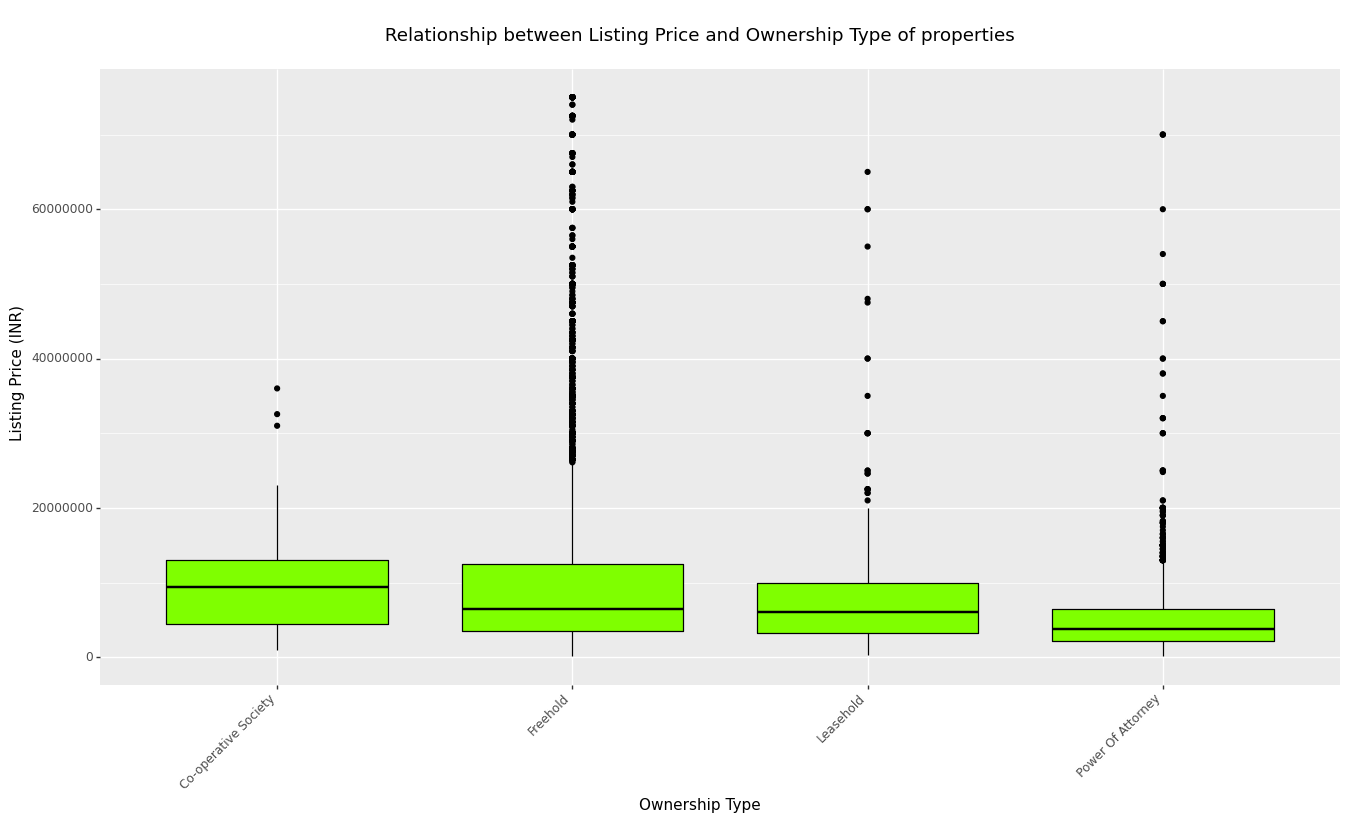

<ggplot: (8789960694409)>

In [ ]:
box12 = ggplot(own_price, aes(x = 'ownership_type', y='listing_price')) + geom_boxplot(colour="black", fill="chartreuse") + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + ylim(0,75000000) + theme(figure_size=(16, 8)) + xlab("Ownership Type") + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Ownership Type of properties \n") 
plt.figure(figsize=(15,15)) 
box12

***Observations from the relationship between ownership type and listing price***:

**1. Properties owned by Co-operative Societies have higher median prices compared to other properties based on ownership type -- followed by freehold ownership -- leasehold ownership -- and finally Power of Attorney.**
***2. Prices of properties owned by Co-ops are skewed to the left, while prices of properties owned by Freehold are skewed to the right***.

# ***Construction Status***

In [ ]:
df['construction_status'].unique()

array([nan, '5 to 10 years', 'Less than 5 years', '10 to 15 years',
       'Above 20 years', 'New Construction', '15 to 20 years',
       'Under Construction'], dtype=object)

In [ ]:
age_price = df['construction_status'].value_counts().to_frame().reset_index()
age_price = age_price.rename(columns={'index':'construction_status', 'construction_status':'count'})
age_price = age_price.dropna()
age_price

construction_status  count
0       5 to 10 years   5429
1    New Construction   4189
2   Less than 5 years   3788
3      10 to 15 years   2513
4      Above 20 years   1429
5      15 to 20 years   1222
6  Under Construction    335

In [ ]:
fig13 = px.pie(age_price, values="count", names="construction_status", width=1000, height=900, title='Distribution of age of properties')
fig13.update_layout(legend={"x" : 1.7, "y" : 1}, font=dict(
        family="Times New Roman, monospace",
        size=18,
        color="black"
    ))


fig13.show(renderer="colab")

***Observation of Distribution of Properties based on property age/construction status:***

***1. The property listings are dominated by newer properties with the dominating properties being in the following ranges - 5 to 10 years, New Construction, Less than 5 years [in order of maximum count]***

***Relationship between construction status of properties and their listing price***:

In [ ]:
const_price = df[['construction_status', 'listing_price']]
const_price = const_price.dropna()

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

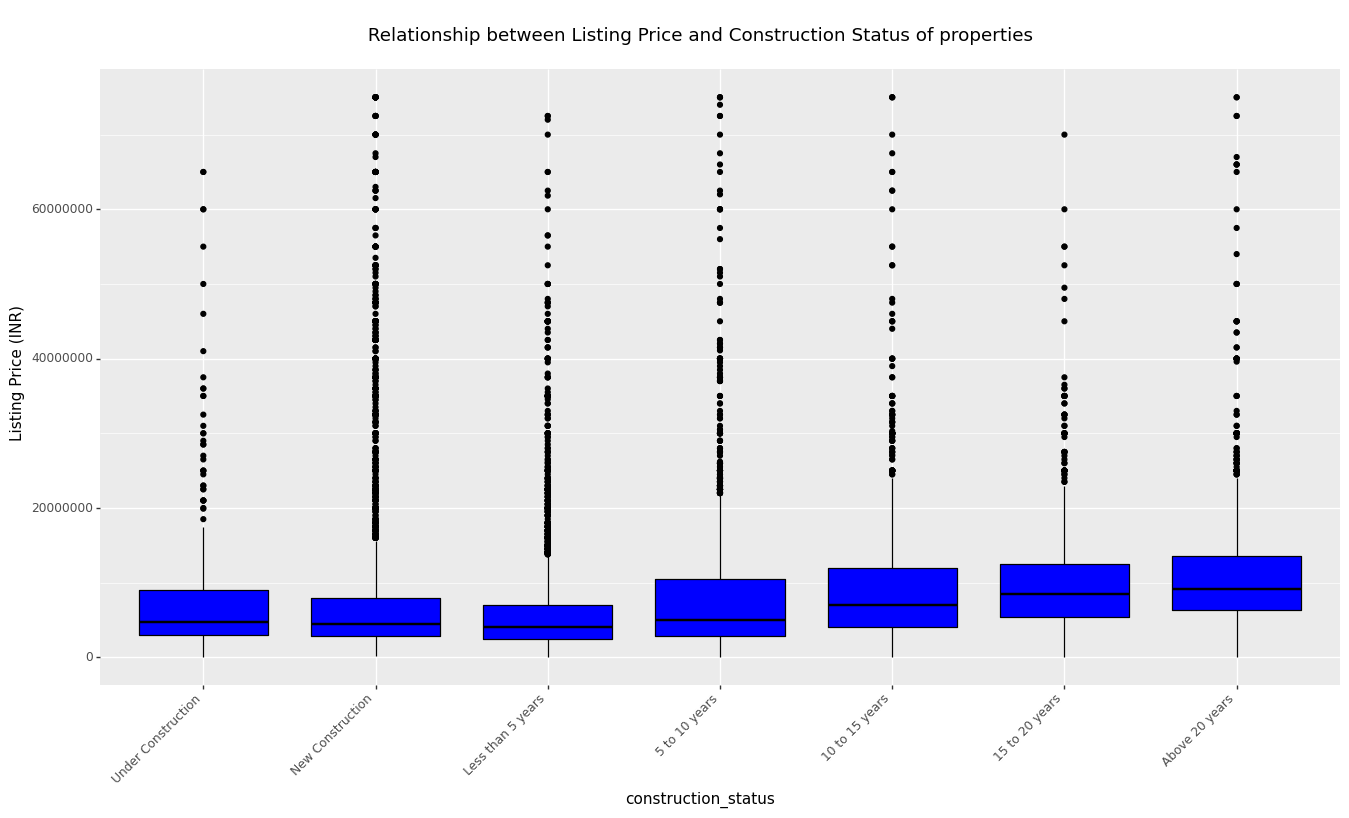

<ggplot: (8789960300861)>

In [ ]:
box13 = ggplot(const_price, aes(x = 'construction_status', y='listing_price')) + geom_boxplot(colour="black", fill="blue") + theme(axis_text_x  = element_text(angle = 45, hjust = 1)) + ylim(0,75000000) + theme(figure_size=(16, 8)) + ylab("Listing Price (INR)") + ggtitle("\n Relationship between Listing Price and Construction Status of properties \n") + scale_x_discrete(name="construction_status",
                    limits=("Under Construction", "New Construction","Less than 5 years","5 to 10 years","10 to 15 years","15 to 20 years","Above 20 years"))
plt.figure(figsize=(15,15)) 
box13

***We can observe a pattern of an increase in the median listing price as the construction status of the properties increases.***

# ***Booking Amount***

In [ ]:
df['booking_amount'].unique()

array([nan, '4.0 Lac', ' 50,000', ' 20.0 Lac', ' 2.0 Lac', ' 5.0 Lac',
       ' 2.4 Lac', ' 85.0 Lac', ' 1.0 Lac', ' 27.0 Lac', ' 1', ' 4.5 Lac',
       ' 10.0 Lac', ' 11,000', ' 25.0 Lac', ' 2.2 Lac', ' 1.1 Lac',
       ' 51,000', ' 3.0 Lac', ' 60,000', ' 13.0 Lac', ' 15.0 Lac',
       ' 38.0 Lac', ' 60.0 Lac', ' 40.0 Lac', ' 7.0 Lac', ' 16.0 Lac',
       ' 8.5 Lac', ' 1.5 Lac', ' 8.0 Lac', ' 13.5 Lac', ' 50.0 Lac',
       ' 20,000', ' 0', ' 3.2 Lac', ' 30.0 Lac', ' 10,000', ' 67.5 Lac',
       ' 2.3 Lac', ' 11.0 Lac', ' 1.8 Lac', ' 31.0 Lac', ' 1.6 Lac',
       ' 21,000', ' 17.3 Lac', ' 9.5 Lac', ' 1,100', ' 3.5 Lac',
       ' 14.5 Lac', ' 6.0 Lac', ' 2.5 Lac', ' 3.9 Lac', ' 56.0 Lac',
       ' 22.5 Lac', ' 26.0 Lac', ' 3', ' 12.5 Lac', ' 6.5 Lac',
       ' 12.0 Lac', ' 17.5 Lac', ' 65,000', ' 5.5 Lac', ' 45.0 Lac',
       ' 17.0 Lac', ' 4.0 Lac', ' 18.0 Lac', ' 14.0 Lac', ' 3.6 Lac',
       ' 1.3 Lac', ' 7.6 Lac', ' 51.0 Lac', ' 35.0 Lac', ' 1.7 Lac',
       ' 5,100', ' 67.0 Lac', '

For booking amount, we see lac and cr --> convert all to thousands

In [ ]:
book_list = df[['listing_price', 'booking_amount']]
book_list = book_list.dropna()

Extract value names

In [ ]:
book_list['metric']=book_list['booking_amount'].str.extract('([a-z]+)')
book_list.tail()

listing_price booking_amount metric
42456  12,100,000.00        1.0 Lac     ac
42458  14,500,000.00        1.0 Lac     ac
42459  10,000,000.00        1.0 Lac     ac
42460  45,000,000.00        5.0 Lac     ac
42461  13,000,000.00        1.0 Lac     ac

In [ ]:
#book_list = book_list.dropna()

In [ ]:
book_list['booking_amount'] =  book_list['booking_amount'].str.replace(r'\D',"") #replacing all non digits with empty string

book_list['booking_amount'] = pd.to_numeric(book_list['booking_amount'], errors='coerce')
book_list

listing_price  booking_amount metric
4       4,000,000.00              40     ac
14      3,950,000.00           50000    NaN
20     11,000,000.00             200     ac
22     20,000,000.00              20     ac
38     17,500,000.00              50     ac
...              ...             ...    ...
42456  12,100,000.00              10     ac
42458  14,500,000.00              10     ac
42459  10,000,000.00              10     ac
42460  45,000,000.00              50     ac
42461  13,000,000.00              10     ac

[10645 rows x 3 columns]

In [ ]:
book_list['booking_amount'] = book_list['booking_amount'].astype(int)

In [ ]:
book_list['metric'].unique()

array(['ac', nan, 'r'], dtype=object)

In [ ]:
val2 = {np.nan: 1,
    'ac': 100000,
    'r': 10000000}

book_list['booking_amount (K)'] = book_list['booking_amount']*(book_list['metric'].map(val2))

book_list

listing_price  booking_amount metric  booking_amount (K)
4       4,000,000.00              40     ac             4000000
14      3,950,000.00           50000    NaN               50000
20     11,000,000.00             200     ac            20000000
22     20,000,000.00              20     ac             2000000
38     17,500,000.00              50     ac             5000000
...              ...             ...    ...                 ...
42456  12,100,000.00              10     ac             1000000
42458  14,500,000.00              10     ac             1000000
42459  10,000,000.00              10     ac             1000000
42460  45,000,000.00              50     ac             5000000
42461  13,000,000.00              10     ac             1000000

[10645 rows x 4 columns]

***Relationship between Booking amount and Listing price***

[(0.0, 250000000.0)]

[(0.0, 300000000.0)]

Text(0, 0.5, 'Listing (INR (in ten crores))')

Text(0.5, 0, 'Booking Amount (INR (in ten crores))')

Text(0.5, 1.0, '\nRegression Plot of Listing Price vs Booking amount\n')

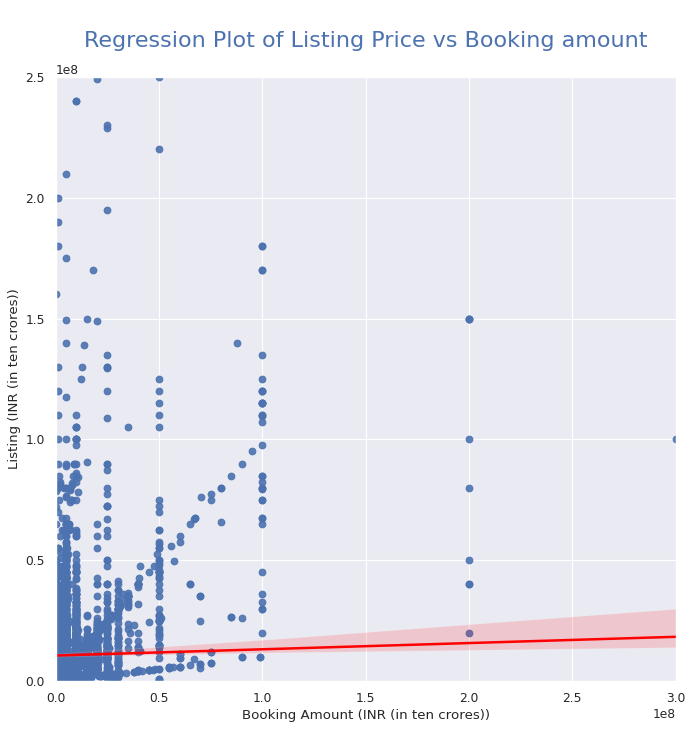

In [ ]:
bl = sns.regplot(x='booking_amount (K)', y='listing_price', data=book_list, color='b', scatter_kws={'alpha':0.9}, line_kws={'color': 'red'})
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
bl.figure.set_size_inches(10, 10)

bl.set(ylim=(0,250000000))
bl.set(xlim=(0,300000000))
bl.set_ylabel("Listing (INR (in ten crores))")
bl.set_xlabel("Booking Amount (INR (in ten crores))")
bl.set_title("\n" + "Regression Plot of Listing Price vs Booking amount" + "\n", fontsize=20, color='b')

***While the regression line indicates a weak positive correlation [line not entirely flat], there is an observation that stands out. Between the xlimits of INR 0 - 10,00,00,000, there is a positive correlation trend that stands out. This is clouded by the variation observations as well***.

***Zoom in further to observe correlation between the specified points***.

[(0.0, 250000000.0)]

[(0.0, 150000000.0)]

Text(0, 0.5, 'Listing (INR (in ten crores))')

Text(0.5, 0, 'Booking Amount (INR (in ten crores))')

Text(0.5, 1.0, '\nRegression Plot of Listing Price vs Booking amount\n')

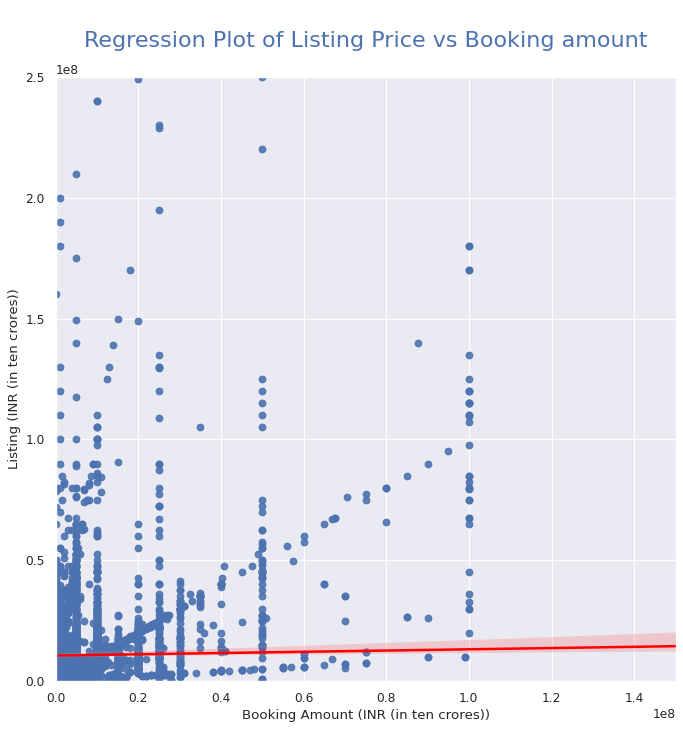

In [ ]:
bl = sns.regplot(x='booking_amount (K)', y='listing_price', data=book_list, color='b', scatter_kws={'alpha':0.9}, line_kws={'color': 'red'})
sns.set_theme(color_codes=True)

#plt.figure(figsize=(10,10))
bl.figure.set_size_inches(10, 10)

bl.set(ylim=(0,250000000))
bl.set(xlim=(0,150000000))
bl.set_ylabel("Listing (INR (in ten crores))")
bl.set_xlabel("Booking Amount (INR (in ten crores))")
bl.set_title("\n" + "Regression Plot of Listing Price vs Booking amount" + "\n", fontsize=20, color='b')

***A visible trend of positive correlation can be observed between the booking amount price of INR 0 - 10,00,00,000***

***Booking Amount feature can be explored further.***